## **I. Import Necessary Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from scipy import stats
import scipy
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyoff
import plotly
import plotly.graph_objs as go
from datetime import datetime, date
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
data = pd.read_csv('data_cleaned/Iowa_Liquor_Sales_final.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice Number         object 
 1   Order Date             object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               int64  
 7   County                 object 
 8   Category               int64  
 9   Category Name          object 
 10  Vendor Number          int64  
 11  Vendor Name            object 
 12  Product Key            int64  
 13  Product Name           object 
 14  Pack                   int64  
 15  Bottle Volume (ml)     float64
 16  State Bottle Cost      float64
 17  State Bottle Retail    float64
 18  Bottles Sold           int64  
 19  Sale (Dollars)         float64
 20  Volume Sold (Liters)   float64
 21  Volume Sold (Gallons)  float64
 22  Store Longitude   

In [3]:
# Change type some features
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Check types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice Number         object        
 1   Order Date             datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               int64         
 7   County                 object        
 8   Category               int64         
 9   Category Name          object        
 10  Vendor Number          int64         
 11  Vendor Name            object        
 12  Product Key            int64         
 13  Product Name           object        
 14  Pack                   int64         
 15  Bottle Volume (ml)     float64       
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

In [4]:
data.head(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude,Customer Segment
0,INV-54554500001,2023-01-02,5245,BEST TRIP,"1516, SE 1ST ST",DES MOINES,50315,POLK,1022200,100% AGAVE TEQUILA,260,DIAGEO AMERICAS,89177,CASAMIGOS REPOSADO 750.0 (ml),6,750.0,29.99,44.99,3,134.97,2.25,0.59,-93.61379,41.57608,Champions
1,INV-54554500002,2023-01-02,5245,BEST TRIP,"1516, SE 1ST ST",DES MOINES,50315,POLK,1011200,STRAIGHT BOURBON WHISKIES,65,JIM BEAM BRANDS,19064,JIM BEAM 375.0 (ml),24,375.0,5.60,8.40,3,25.20,1.12,0.29,-93.61379,41.57608,Champions
2,INV-54554500008,2023-01-02,5245,BEST TRIP,"1516, SE 1ST ST",DES MOINES,50315,POLK,1022100,MIXTO TEQUILA,395,PROXIMO,89193,JOSE CUERVO ESPECIAL REPOSADO 200.0 (ml),48,200.0,3.63,5.45,48,261.60,9.60,2.53,-93.61379,41.57608,Champions


In [5]:
data.tail(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude,Customer Segment
2616991,INV-65592700006,2023-12-22,10313,KONVENIENCE KORNER CENTERVILLE / CENTERVILLE,1508 S 18TH ST,CENTERVILLE,52544,APPANOOSE,1012100,CANADIAN WHISKIES,259,HEAVEN HILL BRANDS,11771,BLACK VELVET MINI 50.0 (ml),8,50.0,8.87,13.31,24,319.44,1.2,0.31,-92.86842,40.719792,Need Attention
2616992,INV-65612300008,2023-12-22,6281,MARTELLE STORE / MARTELLE,400 SOUTH MILITARY STREET,MARTELLE,52305,JONES,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,65013,FIREBALL CINNAMON WHISKEY MINI SLEEVE 50.0 (ml),12,50.0,4.30,6.45,12,77.40,0.6,0.15,-91.36049,42.019954,Need Attention
2616993,INV-65612300007,2023-12-22,6281,MARTELLE STORE / MARTELLE,400 SOUTH MILITARY STREET,MARTELLE,52305,JONES,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,64870,FIREBALL CINNAMON WHISKEY 100.0 (ml),48,100.0,1.00,1.50,96,144.00,9.6,2.53,-91.36049,42.019954,Need Attention


In [6]:
data.columns

Index(['Invoice Number', 'Order Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'County', 'Category', 'Category Name',
       'Vendor Number', 'Vendor Name', 'Product Key', 'Product Name', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'Store Longitude', 'Store Latitude',
       'Customer Segment'],
      dtype='object')

In [7]:
RFM_color = ['#CAECFB', '#68DFC4', '#07B3B2', '#005A74']
sb.color_palette(RFM_color)

[(0.792156862745098, 0.9254901960784314, 0.984313725490196),
 (0.40784313725490196, 0.8745098039215686, 0.7686274509803922),
 (0.027450980392156862, 0.7019607843137254, 0.6980392156862745),
 (0.0, 0.35294117647058826, 0.4549019607843137)]

In [8]:
color_samples = ['#01A1D2', '#70C2D7', '#CAECFB', '#68DFC4', '#07B3B2', '#005A74']
sb.color_palette(color_samples)

[(0.00392156862745098, 0.6313725490196078, 0.8235294117647058),
 (0.4392156862745098, 0.7607843137254902, 0.8431372549019608),
 (0.792156862745098, 0.9254901960784314, 0.984313725490196),
 (0.40784313725490196, 0.8745098039215686, 0.7686274509803922),
 (0.027450980392156862, 0.7019607843137254, 0.6980392156862745),
 (0.0, 0.35294117647058826, 0.4549019607843137)]

In [9]:
custom_palette = sb.color_palette(color_samples, as_cmap=True)
custom_palette

['#01A1D2', '#70C2D7', '#CAECFB', '#68DFC4', '#07B3B2', '#005A74']

## **II. Diagnostic Analytics**

### Case study questions:  

Dimension: Sales  

- Question 1: What is the revenue, cost, and profit for each month?

- Question 2: What is the monthly growth rate (MGR) of revenue?

- Question 3: Is there any seasonal variation in revenue?

Dimension: Orders

- Question 4: How many orders are placed each month?

- Question 5: What is the average revenue per order?

Dimension: Customer

- Question 6: How many monthly active customers (MACs) are there?

- Question 7: What is the monthly retention rate (MRR)?

- Question 8: What is the revenue and profit per customer?

- Question 9: What is the revenue and profit per customer segment?

Dimension: Product

- Question 10: What are the top-selling products for the year?

- Question 11: How many units of each product are sold each month?

- Question 12: How many different wine products does each customer consume?

- Question 13: Do customers who consume a more diverse variety of wines tend to purchase more products and generate more profit?

- Question 14: Is the number of wine types consumed affected by customer segment?

Dimension: Place

- Question 15: Is the number of customers affected by geographic location?

- Question 16: Is profit affected by geographic location?

### **Dimension: Sales**

#### *Question 1: What is the revenue, cost, and profit for each month?*

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice Number         object        
 1   Order Date             datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               int64         
 7   County                 object        
 8   Category               int64         
 9   Category Name          object        
 10  Vendor Number          int64         
 11  Vendor Name            object        
 12  Product Key            int64         
 13  Product Name           object        
 14  Pack                   int64         
 15  Bottle Volume (ml)     float64       
 16  State Bottle Cost      float64       
 17  State Bottle Retail    float64       
 18  Bottles Sold          

In [11]:
# Create 'Total Cost' column
data['Total Cost'] = data['State Bottle Cost'] * data['Bottles Sold']

# Creating MonthKey field for reporting and visualization
# data['Month Key'] = data['Order Date'].map(lambda date: 100*date.year + date.month)
# data['Month Key'] = data['Month Key'].astype('str')

# Tạo cột mới "Month Key" từ cột "Order Date" với định dạng mm-yyyy
data['Month Key'] = data['Order Date'].dt.strftime('%Y-%m')

# Sample check
data.sample(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude,Customer Segment,Total Cost,Month Key
740312,INV-63825000002,2023-10-31,6148,BEER ON FLOYD / SIOUX CITY,3132 FLOYD BLVD,SIOUX CITY,51108,WOODBURY,1701100,TEMPORARY & SPECIALTY PACKAGES,260,DIAGEO AMERICAS,102092,CAPTAIN MORGAN OSR W/NFL TIN CUP 1750.0 (ml),6,1750.0,18.00,27.00,6,162.00,10.5,2.77,-96.37095,42.53325,Champions,108.00,2023-10
607013,INV-58727200021,2023-05-23,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103,WOODBURY,1011100,BLENDED WHISKIES,260,DIAGEO AMERICAS,25608,SEAGRAMS 7 CROWN 1750.0 (ml),6,1750.0,13.99,20.99,6,125.94,10.5,2.77,-96.42021,42.51054,Champions,83.94,2023-05
2307231,INV-56896200007,2023-03-23,4608,CASEY'S GENERAL STORE #3050 / COUNCIL BLUFFS,"510, 23RD AVE",COUNCIL BLUFFS,51503,POTTAWATTAMIE,1011200,STRAIGHT BOURBON WHISKIES,65,JIM BEAM BRANDS,19066,JIM BEAM 750.0 (ml),12,750.0,11.00,16.50,12,198.00,9.0,2.37,-95.85214,41.26520,Potential Loyalist,132.00,2023-03


In [12]:
# Group Revenue by Month
revenue_month = data.groupby('Month Key')['Sale (Dollars)'].sum().reset_index()
revenue_month['Revenue (Million Dollars)'] = round((revenue_month['Sale (Dollars)'] / 1000000),2)
revenue_month.drop('Sale (Dollars)', axis = 1, inplace = True)
revenue_month

,Month Key,Revenue (Million Dollars)
0,2023-01,31.89
1,2023-02,31.52
2,2023-03,35.71
3,2023-04,32.73
4,2023-05,40.27
5,2023-06,41.17
6,2023-07,35.88
7,2023-08,39.89
8,2023-09,35.21
9,2023-10,40.26


In [13]:
# Group Cost by Month
cost_month = data.groupby('Month Key')['Total Cost'].sum().reset_index()
cost_month['Cost (Million Dollars)'] = round((cost_month['Total Cost'] / 1000000),2)
cost_month.drop('Total Cost', axis = 1, inplace = True)

# Merge Revenue data with Cost data to one
summary_sale = cost_month.merge(revenue_month, on = 'Month Key')

# Calculate Profit for each month
summary_sale['Profit (Million Dollars)'] = summary_sale['Revenue (Million Dollars)'] - summary_sale['Cost (Million Dollars)']

# Calculate Profit Margin for each month
summary_sale['Profit Margin (%)'] = round((summary_sale['Profit (Million Dollars)'] / summary_sale['Revenue (Million Dollars)']) * 100,2)
summary_sale

,Month Key,Cost (Million Dollars),Revenue (Million Dollars),Profit (Million Dollars),Profit Margin (%)
0,2023-01,21.26,31.89,10.63,33.33
1,2023-02,21.01,31.52,10.51,33.34
2,2023-03,23.81,35.71,11.90,33.32
3,2023-04,21.82,32.73,10.91,33.33
4,2023-05,26.87,40.27,13.40,33.28
5,2023-06,27.44,41.17,13.73,33.35
6,2023-07,23.91,35.88,11.97,33.36
7,2023-08,26.59,39.89,13.30,33.34
8,2023-09,23.47,35.21,11.74,33.34
9,2023-10,26.83,40.26,13.43,33.36


In [14]:
summary_sale["Cost (Million Dollars)"].sum()

296.53

In [15]:
summary_sale_unpivot = summary_sale[['Month Key', 'Revenue (Million Dollars)', 'Profit (Million Dollars)']].copy()
summary_sale_unpivot = summary_sale_unpivot.set_index("Month Key").stack().reset_index()
summary_sale_unpivot = summary_sale_unpivot.rename(columns = {'level_1' : 'Metric', 0 : 'Values'})
summary_sale_unpivot

,Month Key,Metric,Values
0,2023-01,Revenue (Million Dollars),31.89
1,2023-01,Profit (Million Dollars),10.63
2,2023-02,Revenue (Million Dollars),31.52
3,2023-02,Profit (Million Dollars),10.51
4,2023-03,Revenue (Million Dollars),35.71
5,2023-03,Profit (Million Dollars),11.90
6,2023-04,Revenue (Million Dollars),32.73
7,2023-04,Profit (Million Dollars),10.91
8,2023-05,Revenue (Million Dollars),40.27
9,2023-05,Profit (Million Dollars),13.40


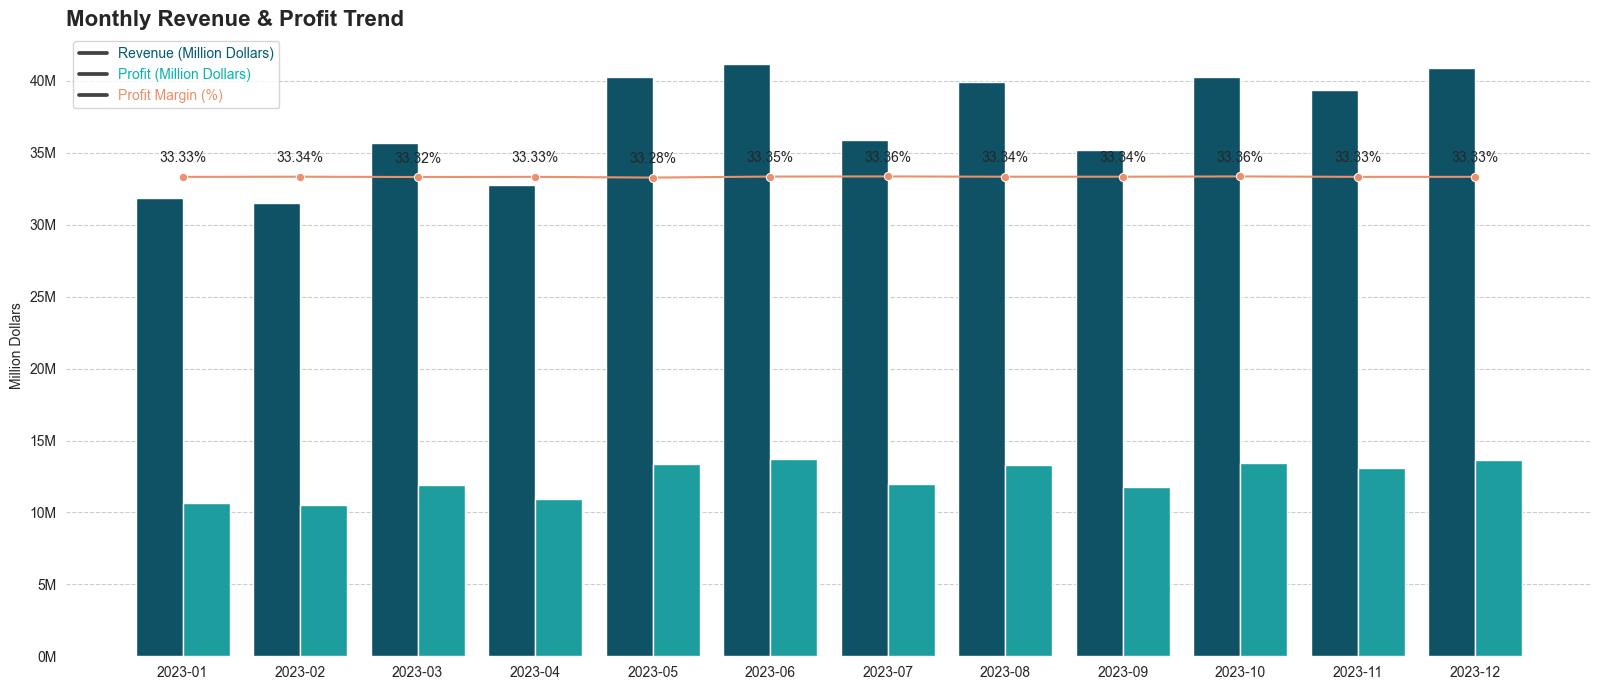

In [16]:
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (16,7))
plt.title('Monthly Revenue & Profit Trend', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.barplot(data = summary_sale_unpivot, x = 'Month Key', y = 'Values', hue= 'Metric', palette= ['#005A74', '#07B3B2'])
sb.lineplot(x="Month Key", y="Profit Margin (%)", color='#EC8F6A', data=summary_sale, marker="o" )
profit_margin = summary_sale['Profit Margin (%)'].to_list()
#Add number for each columns
for i, value in enumerate(profit_margin):
    plt.text(i, value + 1, f"{profit_margin[i]}%",  ha = 'center', fontsize=10)
plt.legend(labels=['Revenue (Million Dollars)', 'Profit (Million Dollars)', 'Profit Margin (%)'], labelcolor = ['#005A74','#07B3B2', "#EC8F6A"])
plt.xlabel("")
plt.ylabel("Million Dollars")
plt.tight_layout()
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x))) 
plt.show();

In [17]:
print('Average Monthly Revenue:',round(summary_sale['Revenue (Million Dollars)'].mean(),0),"M")
print('Average Monthly Profit:',round(summary_sale['Profit (Million Dollars)'].mean(),0),"M")
print('Average Monthly Profit Mergin:',round(summary_sale['Profit Margin (%)'].mean(),0),"%")

Average Monthly Revenue: 37.0 M
Average Monthly Profit: 12.0 M
Average Monthly Profit Mergin: 33.0 %


`Observations:`

With an average revenue of $37 million and an average profit of $12 million per month, we can gain some insights into the overall picture of the retail wine sales landscape in Iowa:

- The highest revenue in the year exceeded $40 million in the months of June, October, and December. The remaining months maintained a steady level of $32 to $39 million.

- In addition, revenue fluctuations are also correlated with profit, as the months with exceptionally high revenue also brought increased profit growth (June, 19, December).

- On the other hand, profit margins remained relatively stable throughout 2023, always hovering around 33%.

Trends:

- Overall Trend: Both retail wine revenue and profit in Iowa trended steadily upwards throughout 2023. This suggests that the demand for wine in Iowa is increasing.

- Seasonal Trend: Looking at the chart, it is easy to see that wine wholesaling in Iowa tends to be higher at the end of the year (especially in October and December). Holidays like Thanksgiving and Christmas could be one of the reasons for this trend.

- Profit Margin: Wine wholesaling profit margins in Iowa are relatively stable, indicating that the wine industry there is efficient.

Let's delve deeper into the details of the revenue growth for each month in 2023.

#### *Question 2: What is the monthly growth rate (MGR) of revenue?*

In [18]:
# Calculate percent change
pct_change_lst = [0] #Since the first value is for January, and there is no previous month, the growth rate for January is set to 0.
for i in range(len(summary_sale) - 1):
        pct_change = round(((summary_sale['Revenue (Million Dollars)'][i + 1] -  summary_sale['Revenue (Million Dollars)'][i])/summary_sale['Revenue (Million Dollars)'][i])*100,2)
        pct_change_lst.append(pct_change)

# In list percent change
pct_change_lst

[0,
 -1.16,
 13.29,
 -8.35,
 23.04,
 2.23,
 -12.85,
 11.18,
 -11.73,
 14.34,
 -2.24,
 3.96]

In [19]:
# Create 'Percent Change' column for df sale_month by list pct_change_lst
summary_sale['Revenue Percent Change (%)'] = pct_change_lst

# In df
summary_sale

,Month Key,Cost (Million Dollars),Revenue (Million Dollars),Profit (Million Dollars),Profit Margin (%),Revenue Percent Change (%)
0,2023-01,21.26,31.89,10.63,33.33,0.00
1,2023-02,21.01,31.52,10.51,33.34,-1.16
2,2023-03,23.81,35.71,11.90,33.32,13.29
3,2023-04,21.82,32.73,10.91,33.33,-8.35
4,2023-05,26.87,40.27,13.40,33.28,23.04
5,2023-06,27.44,41.17,13.73,33.35,2.23
6,2023-07,23.91,35.88,11.97,33.36,-12.85
7,2023-08,26.59,39.89,13.30,33.34,11.18
8,2023-09,23.47,35.21,11.74,33.34,-11.73
9,2023-10,26.83,40.26,13.43,33.36,14.34


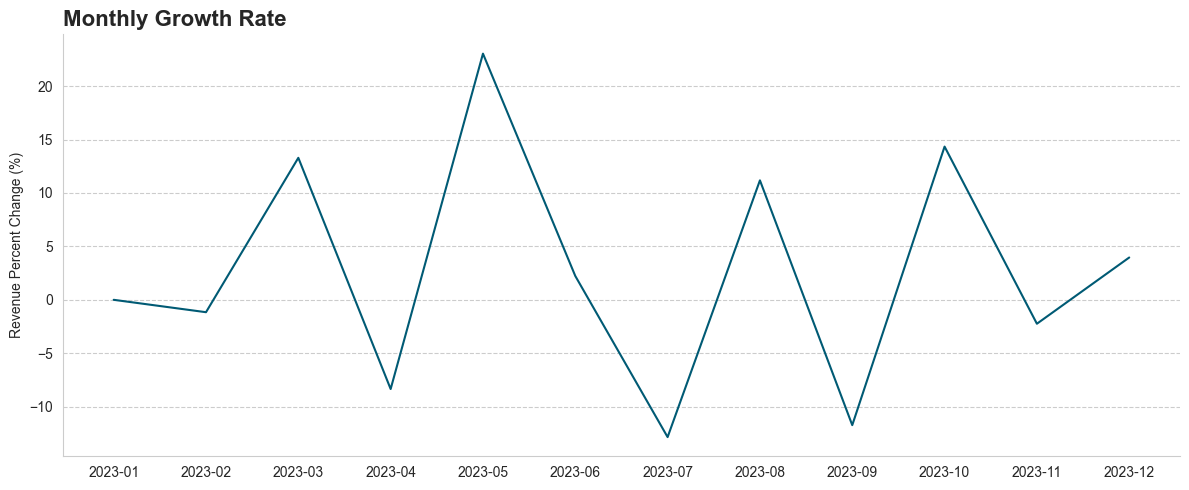

In [20]:
# Visualization
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sb.lineplot(data = summary_sale, y = 'Revenue Percent Change (%)', x = 'Month Key' , color = "#005A74")
plt.grid(axis = 'y', linestyle ='--')
sb.despine(left=False, bottom=False)
plt.xlabel("")
plt.title('Monthly Growth Rate', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
plt.show();

In [21]:
print('Average Monthly Grow Rate:',round(summary_sale['Revenue Percent Change (%)'].mean(),2),"%")

Average Monthly Grow Rate: 2.64 %


`Observations:`

Through the Lineplot chart showing the Monthly Growth Rate, we can gain some insights into the revenue growth in 2023 as follows:

- `General Trend:`

    - The chart shows that the growth rate has an increasing trend throughout the 12 months.

    - The average monthly growth rate is 2.64%.

    - In addition, the data shows some significant fluctuations in the growth rate from month to month in 2023.

- `Growth Periods:`

    - The highest growth rates were recorded in 3 periods: March (13.37%), May (21.57%), and October (14.54%).

    - Predicted reasons:

        - New product launches

        - Effective marketing campaigns

        - Seasonal demand increase

- `Slowdown Periods:`

    - The sharpest declines in growth rate were recorded in 2 periods: July (-12.97%) and September (-11.8%).

    - Predicted reasons:

        - Increased competition

        - Changes in customer preferences

        - Seasonal demand decrease

- `Seasonal Analysis:`

    - There seems to be some seasonality in the data, with higher growth rates in the middle and end of the year.

    - This could be due to a number of factors, such as:

        - Shopping seasons

        - Holidays

        - Business activities

Due to the nature of the dataset only providing time data, in this analysis, we will try to use the seasonal factor to find valuable insights.  
So, are the seasons really affecting the revenue of the wine retail industry in Iowa?

#### *Question 3: Is there any seasonal variation in revenue?*

In [22]:
# Create Month column from Order Date column
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data.sample(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude,Customer Segment,Total Cost,Month Key,Month
941462,INV-60458600008,2023-07-19,2501,HY-VEE #2 (1018) / AMES,640 LINCOLNWAY,AMES,50010,STORY,1012100,CANADIAN WHISKIES,260,DIAGEO AMERICAS,11290,CROWN ROYAL MINI 50.0 (ml),10,50.0,9.95,14.93,1,14.93,0.05,0.01,-93.61927,42.02290,Champions,9.95,2023-07,7
1424100,INV-55676400026,2023-02-08,3443,SUPER SAVER IV,1141 N BROADWAY,COUNCIL BLUFFS,51503,POTTAWATTAMIE,1011300,SINGLE BARREL BOURBON WHISKIES,65,JIM BEAM BRANDS,19116,JIM BEAM SINGLE BARREL 750.0 (ml),6,750.0,19.41,29.12,1,29.12,0.75,0.19,-95.83549,41.27072,Champions,19.41,2023-02,2
1385124,INV-56739100029,2023-03-16,5917,URBANDALE LIQUOR,6401 DOUGLAS AVE. STE 1,URBANDALE,50322,POLK,1081600,WHISKEY LIQUEUR,421,SAZERAC COMPANY INC,64904,FIREBALL CINNAMON WHISKEY PET 1750.0 (ml),6,1750.0,16.00,24.00,6,144.00,10.50,2.77,-93.70588,41.62996,Champions,96.00,2023-03,3


In [23]:
# Create transform function from month to season 
def convert_month(month):
    if month == 1 or month == 2 or month == 3:
        return 'Spring'
    elif month == 4 or month == 5 or month == 6:
        return 'Summer'
    elif month == 7 or month == 8 or month == 9:
        return 'Autumn'
    else:
        return 'Winter'

In [24]:
# Create Season column by convert_month function
data['Season'] = data['Month'].apply(lambda x: convert_month(x))

In [25]:
# Check sample data
data.sample(3)

,Invoice Number,Order Date,Store Number,Store Name,Address,City,Zip Code,County,Category,Category Name,Vendor Number,Vendor Name,Product Key,Product Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Store Longitude,Store Latitude,Customer Segment,Total Cost,Month Key,Month,Season
2222176,INV-58810200007,2023-05-25,2587,HY-VEE FOOD STORE / JOHNSTON,5750 MERLE HAY ROAD,JOHNSTON,50131,POLK,1011600,STRAIGHT RYE WHISKIES,65,JIM BEAM BRANDS,26960,BP KNOB CREEK RYE SINGLE BARREL 750.0 (ml),6,750.0,21.52,32.28,1,32.28,0.75,0.19,-93.69777,41.66481,Champions,21.52,2023-05,5,Summer
623176,INV-61943400071,2023-09-06,2643,HY-VEE WINE AND SPIRITS / WATERLOO,2126 KIMBALL AVE,WATERLOO,50701,BLACK HAWK,1091200,NEUTRAL GRAIN SPIRITS,346,OLE SMOKY DISTILLERY LLC,86970,OLE SMOKY BLUE FLAME MOONSHINE MINI 50.0 (ml),8,50.0,8.75,13.13,1,13.13,0.05,0.01,-92.35698,42.47029,Champions,8.75,2023-09,9,Autumn
656112,INV-60654200194,2023-07-25,2544,HY-VEE FOOD STORE (1403) / MARSHALLTOWN,802 SOUTH CENTER,MARSHALLTOWN,50158,MARSHALL,1022200,100% AGAVE TEQUILA,65,JIM BEAM BRANDS,89836,HORNITOS REPOSADO 750.0 (ml),12,750.0,16.00,24.00,6,144.00,4.50,1.18,-92.91279,42.03909,Champions,96.00,2023-07,7,Autumn


In [26]:
# Group Sale by Season
revenue_season = data.groupby('Season')['Sale (Dollars)'].sum().reset_index()
revenue_season

,Season,Sale (Dollars)
0,Autumn,1.109700e+08
1,Spring,9.912542e+07
2,Summer,1.141650e+08
3,Winter,1.205370e+08


In [27]:
# Order the Season column
revenue_season['Season'] = pd.Categorical(revenue_season['Season'], categories = ["Spring", "Summer", "Autumn", "Winter"], ordered = True)

# Sort df by the Season column
revenue_season = revenue_season.sort_values(by = "Season")

# Convert from Dollars to Million Dollars
revenue_season['Sale (Dollars)'] = round((revenue_season['Sale (Dollars)'] / 1000000),2)

# Rename Sale (Dollars) to Revenue (Million Dollars)
revenue_season = revenue_season.rename(columns = {'Sale (Dollars)' : 'Revenue (Million Dollars)'})
revenue_season

,Season,Revenue (Million Dollars)
1,Spring,99.13
2,Summer,114.16
0,Autumn,110.97
3,Winter,120.54


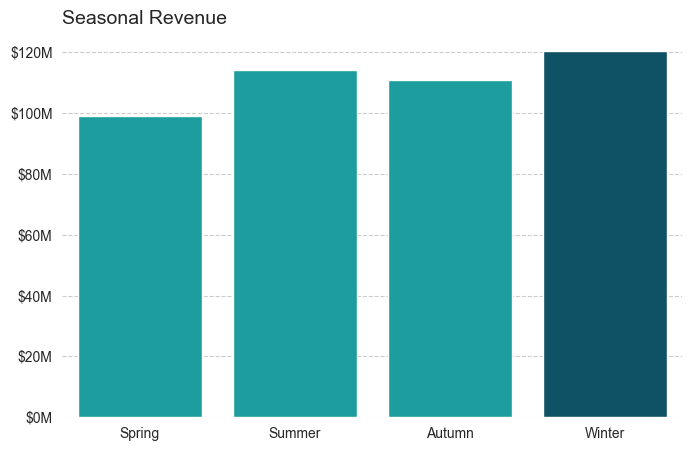

In [28]:
plt.figure(figsize= (8,5))
sb.barplot(data = revenue_season, x = 'Season', y = 'Revenue (Million Dollars)', dodge=False, palette= ['#07B3B2', '#07B3B2' , '#07B3B2', '#005A74']) 
plt.title('Seasonal Revenue', loc = 'left', fontsize = 14)
sb.despine(left=True, bottom=True)
plt.xlabel("")
plt.ylabel("")
plt.grid(axis = 'y', linestyle ='--')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.0f}M'.format(x))) 
plt.show()

`Observations:`

The Seasonal Revenue Barplot above helps us answer the previous question that seasonal factors do indeed affect wine retail revenue in Iowa in 2023, as follows:

- `Trend:`

    - Revenue tends to increase in the summer and winter.

    - The highest revenue, exceeding $120 million, is in the winter.

    - The lowest revenue, less than $100 million, is in the spring.

- `Reasons:`

    - Summer:

        - Warm weather, many people participate in outdoor activities, travel, picnics, leading to increased demand for alcohol consumption in these activities.

        - Holidays and festivals such as Memorial Day, Independence Day, Labor Day encourage gatherings, eating, and drinking.

    - Winter:

        - Cold weather makes people tend to stay at home, gather with friends and family, bringing the possibility of using alcohol to keep warm.

        - Major holidays close together like Thanksgiving, Christmas, and New Year's Day are also occasions for people to consume and push alcohol sales to the highest level in winter compared to the other three seasons of the year. In addition, on these major holidays, in addition to personal consumption needs, there is also the use of alcohol as gifts, which is when higher quality (higher priced) wines are preferred.

    - Spring and Fall: The weather is somewhat mild, with fewer holidays, leading to decreased demand for alcohol.

    - It can be seen that after a series of long major holidays in winter that drive up alcohol consumption, spring is when people focus on getting back to work for the new year, and from there the demand for alcohol decreases significantly. Then the market gradually stabilizes in the two mid-seasons (not much difference between summer and autumn) and starts to increase strongly again in winter. This is like the alcohol consumption cycle in Iowa that the dataset shows.
- `Recommendations:`
    - Increase order quantities in summer and winter to meet high demand, while reducing order quantities in spring and autumn (2 seasons with low consumption). Thereby optimizing inventory costs and avoiding excess inventory.  
    
The revenue indicators analyzed above have shown to some extent the situation of wine wholesaling in Iowa in 2023. Next, let's explore the wine order indicators for the year.

### **Dimension: Order**

#### *Question 4: How many orders are placed each month?*

In [29]:
# Group Year Month by Invoice Number
month_invoice = data.groupby('Month Key')['Invoice Number'].count().reset_index()
month_invoice

,Month Key,Invoice Number
0,2023-01,207866
1,2023-02,184860
2,2023-03,215066
3,2023-04,197446
4,2023-05,233050
5,2023-06,247139
6,2023-07,208478
7,2023-08,230027
8,2023-09,208929
9,2023-10,220589


In [30]:
print('Total Invoice in 2023:',month_invoice['Invoice Number'].sum())

Total Invoice in 2023: 2616994


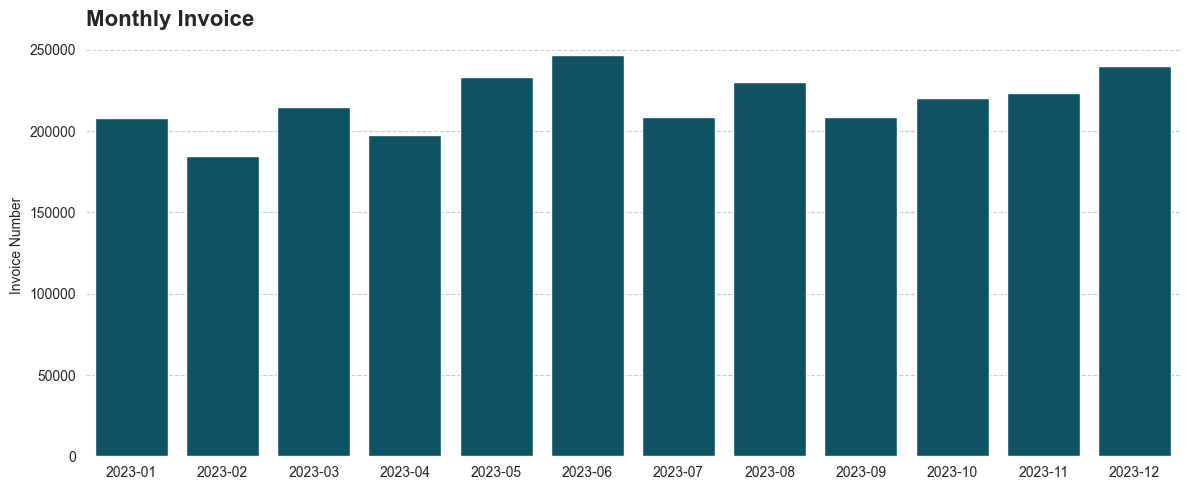

In [31]:
# Visualization
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sb.barplot(data = month_invoice, y = 'Invoice Number', x = 'Month Key', color = "#005A74")
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel("")
sb.despine(left=True, bottom=True)
plt.title('Monthly Invoice', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
# plt.show();

`Observations:`

In 2023, there were a total of 2,616,994 wine orders, of which:  

- The ordering trend increases in the two mid-seasons (from April to June) and the end of the year (from October to December).

- June had the highest number of orders, while February had the lowest number of orders in the 12 months.

The order data shows a dependence between the two revenue and order indicators, as the months with revenue growth are also the months with large order volumes and vice versa. This suggests that revenue and order volume are linearly correlated with each other.

#### *Question 5: What is the average revenue per order?*

In [32]:
avg_order_revenue = data.groupby(['Month Key'])['Sale (Dollars)'].mean().reset_index()
avg_order_revenue['Sale (Dollars)'] = round(avg_order_revenue['Sale (Dollars)'],0)
avg_order_revenue = avg_order_revenue.rename(columns = {'Sale (Dollars)' : 'Revenue (Dollars)'})
avg_order_revenue

,Month Key,Revenue (Dollars)
0,2023-01,153.0
1,2023-02,171.0
2,2023-03,166.0
3,2023-04,166.0
4,2023-05,173.0
5,2023-06,167.0
6,2023-07,172.0
7,2023-08,173.0
8,2023-09,169.0
9,2023-10,182.0


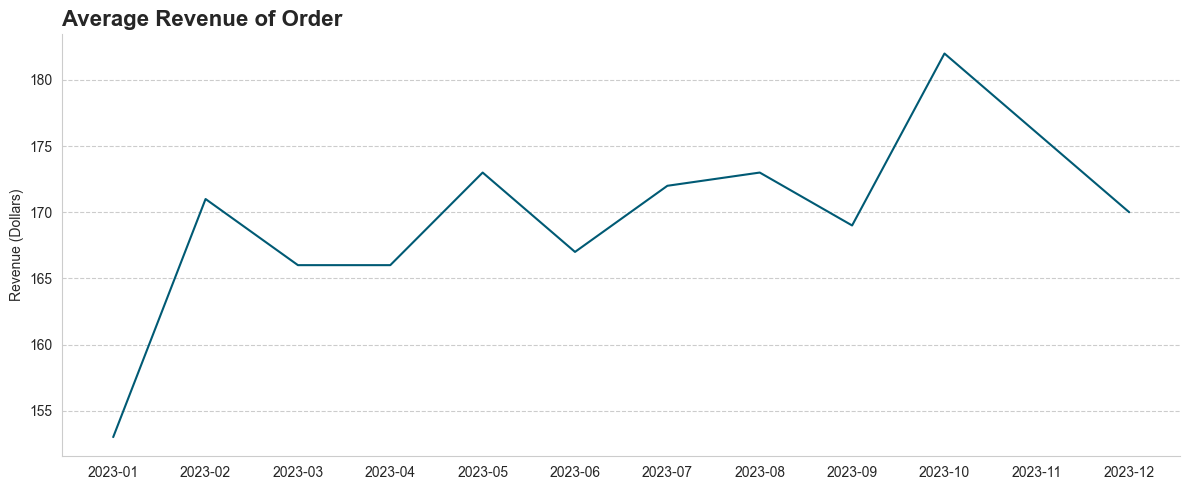

In [33]:
# Visualization
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sb.lineplot(data = avg_order_revenue, y = 'Revenue (Dollars)', x = 'Month Key', color = "#005A74")
plt.grid(axis = 'y', linestyle ='--')
sb.despine(left=False, bottom=False)
plt.xlabel("")
plt.title('Average Revenue of Order', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
plt.show();

In [34]:
corr = pd.merge(avg_order_revenue, summary_sale[['Month Key', 'Revenue (Million Dollars)']])
corr = pd.merge(corr, month_invoice)
corr = corr.rename(columns = {'Revenue (Dollars)' : 'Avg Revenue in Invoice (Dollars)',
                              'Revenue (Million Dollars)' : 'Total Revenue (Million Dollars)'})
corr.corr()

,Avg Revenue in Invoice (Dollars),Total Revenue (Million Dollars),Invoice Number
Avg Revenue in Invoice (Dollars),1.000000,0.577584,0.203272
Total Revenue (Million Dollars),0.577584,1.000000,0.916022
Invoice Number,0.203272,0.916022,1.000000


`Observations:`

The average value of a wine order remained stable throughout the 12 months. The highest difference can be noted between January and October, with a value of approximately $30 per order.

Although previous analyses have shown that seasonality has an impact on the growth trend of wine wholesaling, seasonality does not have an impact on the order value.

This suggests that the growth trend is manifested through customers placing orders more frequently during periods of high demand rather than placing orders with a higher value in a single order. One predicted reason for this phenomenon could be as follows:  
- In order to optimize inventory costs as well as wine storage costs when ordering in large quantities, as most of our customers are retail stores that do not have much storage space.

Problem:  
If we are in a period of order growth, although our revenue will be pushed up, shipping costs will also increase linearly from there. This is because during a growth period, we only increase the frequency of orders, which will lead to an increase in the transportation costs of many small orders.

Solutions:  
To solve this problem, we can propose some solutions as follows:

- Analyze the order value throughout the year to find a certain order threshold. If the order value is below the threshold, the shipping cost will be higher, and vice versa.

- During growth periods (summer and winter), propose special policies for customers who increase the order value in one order, such as discounts, free shipping, etc.

### **Dimension: Customer**

#### *Question 6: How many monthly active customers (MACs) are there?*

In [35]:
# Group Active Customers by Month
act_cus = data.groupby('Month Key')['Store Name'].nunique().reset_index()
act_cus = act_cus.rename(columns = {'Store Name' : 'Active Customers'})
act_cus

,Month Key,Active Customers
0,2023-01,1793
1,2023-02,1760
2,2023-03,1794
3,2023-04,1808
4,2023-05,1871
5,2023-06,1893
6,2023-07,1863
7,2023-08,1890
8,2023-09,1883
9,2023-10,1875


In [36]:
print('Total Customers:', data['Store Name'].nunique())

Total Customers: 2087


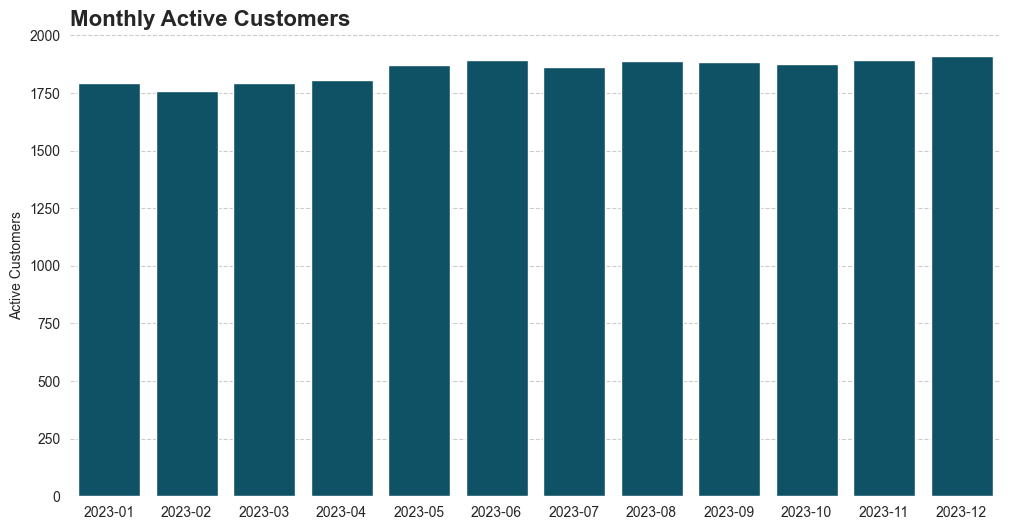

In [37]:
plt.figure(figsize= (12,6))
sb.barplot(data = act_cus, x = 'Month Key', y = 'Active Customers', dodge=False, color = '#005A74') 
plt.title('Monthly Active Customers', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.despine(left=True, bottom=True)
plt.xlabel("")
plt.grid(axis = 'y', linestyle ='--')
plt.show()

`Observations:`

We currently have a total of 2,087 customers. The number of active customers per month remains relatively high throughout 2023, ranging from approximately 1,800 to 1,900 customers per month.  
The positive aspect above is largely due to the fact that the majority of our customers are retail stores in the state. Additionally, as we are the only wine distributor in the state, most of the stores that sell wine will continue to consume our wine for most of their business lifecycle.

#### *Question 7: What is the monthly retention rate (MRR)?*

In [38]:
# Group 'Sale (Dollars)' of each 'Store Name' by 'Month'.
cus_purchase_month = data.groupby(['Store Name', 'Month Key'])['Sale (Dollars)'].sum().reset_index()
cus_purchase_month = cus_purchase_month.rename(columns = {'Sale (Dollars)' : 'Revenue ($)'})
cus_purchase_month.sort_values(by = 'Store Name')

,Store Name,Month Key,Revenue ($)
0,10TH HOLE INN & SUITE / GIFT SHOP,2023-01,3012.05
1,10TH HOLE INN & SUITE / GIFT SHOP,2023-05,1600.97
2,10TH HOLE INN & SUITE / GIFT SHOP,2023-08,1470.32
3,10TH HOLE INN & SUITE / GIFT SHOP,2023-11,1191.89
11,173 CRAFT DISTILLERY,2023-11,7706.52
...,...,...,...
22227,YOUR PRIVATE BAR / URBANDALE,2023-03,819.18
22228,YOUR PRIVATE BAR / URBANDALE,2023-04,1732.20
22229,YOUR PRIVATE BAR / URBANDALE,2023-06,2905.27
22230,YOUR PRIVATE BAR / URBANDALE,2023-07,314.88


In [39]:
# Create dataframe with index is 'Store Name' match with 12 months
# Month with value 1 is a month with purchase, 0 is no purchase
df_retention = pd.crosstab(cus_purchase_month['Store Name'], cus_purchase_month['Month Key'])
df_retention = df_retention.rename_axis(None, axis = 1).reset_index()
df_retention.columns = df_retention.columns.astype('str')
df_retention

,Store Name,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,10TH HOLE INN & SUITE / GIFT SHOP,1,0,0,0,1,0,0,1,0,0,1,0
1,173 CRAFT DISTILLERY,1,1,1,0,0,1,1,1,0,1,1,0
2,1ST STOP BEVERAGE SHOP,1,1,1,1,1,1,1,1,1,1,1,1
3,218 FUEL EXPRESS,1,1,1,1,1,1,1,1,1,1,1,1
4,380BP / SWISHER,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,YESWAY STORE # 1029/ CLARION,1,1,1,1,1,1,1,1,1,1,1,1
2083,YESWAY STORE # 1036/ KANAWHA,1,1,1,1,1,1,1,0,1,0,1,1
2084,YESWAY STORE #1037/ GRIMES,1,1,1,1,1,1,1,1,1,1,0,0
2085,YESWAY STORE #1198 / SWEA CITY,1,1,1,1,1,1,1,1,1,1,0,0


In [40]:
# Get list months
months = df_retention.columns[1:]
months

Index(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype='object')

In [41]:
# Create a retention list, where each element is a dictionary with 3 keys: 'Month Key', 'Total Customers', and 'Retained Customers'.
# We will not calculate for Month 1 since there is no previous month data.
retention_array = []

# Run the loop 11 times since Month 1 will not have a previous adjacent month, so the loop will run from Month 2 to 12
for i in range(len(months) - 1):
    # Create an empty dictionary to assign new data to each iteration
    retention_data = {}

    # Get the current month, starting from Month 2 and increasing with each iteration
    selected_month = months[i+1]

    # Get the previous adjacent month
    prev_month = months[i]

    # Create a key 'Invoice Year Month' with a value of the current month
    retention_data['Month Key'] = selected_month

    # Create a key 'Total Customers Count' with a value of the total number of customers who made a purchase in the current month
    retention_data['Total Customers'] = df_retention[selected_month].sum()

    # Create a key 'Retained Customers Count' with a value of the total number of customers who made a purchase in the current month and also made a purchase in the previous adjacent month
    retention_data['Retained Customers'] = df_retention[(df_retention[selected_month] == 1) & (df_retention[prev_month] == 1)][selected_month].sum()

    # Add the dictionary to the previously created retention list
    retention_array.append(retention_data)
    print("**********************************************************" + selected_month + "**********************************************************")
    print(retention_array, '\n')

**********************************************************2023-02**********************************************************
[{'Month Key': '2023-02', 'Total Customers': 1760, 'Retained Customers': 1688}] 

**********************************************************2023-03**********************************************************
[{'Month Key': '2023-02', 'Total Customers': 1760, 'Retained Customers': 1688}, {'Month Key': '2023-03', 'Total Customers': 1794, 'Retained Customers': 1687}] 

**********************************************************2023-04**********************************************************
[{'Month Key': '2023-02', 'Total Customers': 1760, 'Retained Customers': 1688}, {'Month Key': '2023-03', 'Total Customers': 1794, 'Retained Customers': 1687}, {'Month Key': '2023-04', 'Total Customers': 1808, 'Retained Customers': 1693}] 

**********************************************************2023-05**********************************************************
[{'Month Key': '2023-

In [42]:
# After the loop above, we have an array of dictionaries
# From there, we create the retention dataframe using the data in the retention_array
retention = pd.DataFrame(retention_array)

# Calculate the Retention Rate as follows:
#     Customers Retention Rate = (Retained Customers / Total Customers) * 100
# Where:
#     Retained Customers are customers who made a purchase in the previous adjacent month and continue to make a purchase in the current month.
#     Total Customers is the total number of customers in the current month (including customers from the previous month who continue to purchase in the current month and new customers who purchase in the current month).
retention['Customers Retention Rate (%)'] = round((retention['Retained Customers'] / retention['Total Customers']) * 100, 2)
retention

,Month Key,Total Customers,Retained Customers,Customers Retention Rate (%)
0,2023-02,1760,1688,95.91
1,2023-03,1794,1687,94.04
2,2023-04,1808,1693,93.64
3,2023-05,1871,1738,92.89
4,2023-06,1893,1805,95.35
5,2023-07,1863,1802,96.73
6,2023-08,1890,1799,95.19
7,2023-09,1883,1803,95.75
8,2023-10,1875,1796,95.79
9,2023-11,1894,1792,94.61


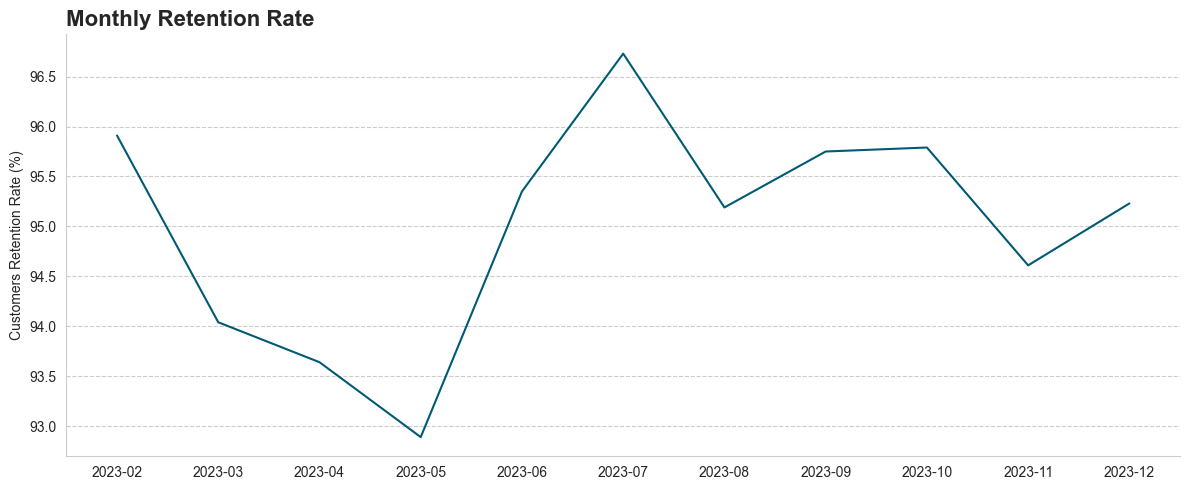

In [43]:
# Visualization
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize = (12,5))
sb.lineplot(data = retention, y = retention['Customers Retention Rate (%)'], x = 'Month Key', color = "#005A74")
plt.grid(axis = 'y', linestyle ='--')
sb.despine(left=False, bottom=False)
plt.xlabel("")
plt.title('Monthly Retention Rate', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.tight_layout()
plt.show();

`Observations:`

As explained in the previous analysis regarding our customer base characteristics, it can be observed that the monthly customer retention rate is consistently high and remains stable (ranging from 94% to 95%).

However, after a strong rebound of approximately 96% of returning customers in February, the retention rate exhibited a downward trend for the next three consecutive months, from March to May, before steadily increasing again. This could be hypothesized based on a reason not present in the dataset as follows:

- The February rebound was not as effective, products were more difficult to sell, and consumer spending was lower during this period.  

Despite this, the consistently high customer retention rate throughout most of the year is a positive sign that Iowa's wine distribution system is operating relatively efficiently.

#### *Question 8: What is the revenue and profit per customer?*

In [44]:
# Create Cost of each Store dataframe
cost_data = data.groupby(['Store Name'])['Total Cost'].sum().to_frame().reset_index()
cost_data = cost_data.rename(columns = {'Total Cost' : 'Cost'})

# Create Revenue of each Store dataframe
revenue_data = data.groupby(['Store Name'])['Sale (Dollars)'].sum().to_frame().reset_index()
revenue_data = revenue_data.rename(columns = {'Sale (Dollars)' : 'Revenue'})

# Merge Cost df with Revenue df to one
summary_customers = cost_data.merge(revenue_data, on = 'Store Name')

# Calculate Profit
summary_customers['Profit'] = summary_customers['Revenue'] - summary_customers['Cost']
summary_customers = summary_customers.sort_values(by = 'Profit', ascending = False)
summary_customers.reset_index(drop = True, inplace = True)
summary_customers

,Store Name,Cost,Revenue,Profit
0,HY-VEE #3 / BDI / DES MOINES,11109852.84,16666951.51,5557098.67
1,"CENTRAL CITY LIQUOR, INC.",10651866.67,15980052.64,5328185.97
2,ANOTHER ROUND / DEWITT,4595040.64,6893668.59,2298627.95
3,HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY,4078815.00,6119050.09,2040235.09
4,BENZ DISTRIBUTING,3493393.82,5241556.59,1748162.77
...,...,...,...,...
2082,COLFAX TRUCK STOP LLC / COLFAX,749.83,1125.03,375.20
2083,MOES MART #13 / CASEY,705.12,1057.68,352.56
2084,WILDCAT DISTILLING / DUNCOMBE,360.00,540.00,180.00
2085,MARTELLE STORE / MARTELLE,147.60,221.40,73.80


In [45]:
# Sum profit all of stores
total_profit = summary_customers['Profit'].sum()

# Calculate the cumulative profit and the corresponding number of stores
cumulative_profit = 0
num_stores_for_90_percent_profit = 0
stores_for_90_percent_profit = []

for index, row in summary_customers.iterrows():
    cumulative_profit += row['Profit']
    num_stores_for_90_percent_profit += 1
    stores_for_90_percent_profit.append({'Store Name': row['Store Name'], 'Profit': row['Profit']})
    if cumulative_profit > 0.9 * total_profit:
        break

# Create new DataFrame from list stores create 90% profit
df_90_percent_profit = pd.DataFrame(stores_for_90_percent_profit)

print("Number of Stores create 90% profit:", num_stores_for_90_percent_profit)
print("The new DataFrame contain stores information create 90% profit:")
print(df_90_percent_profit)

Number of Stores create 90% profit: 991
The new DataFrame contain stores information create 90% profit:
                                        Store Name      Profit
0                     HY-VEE #3 / BDI / DES MOINES  5557098.67
1                        CENTRAL CITY LIQUOR, INC.  5328185.97
2                           ANOTHER ROUND / DEWITT  2298627.95
3    HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY  2040235.09
4                                BENZ DISTRIBUTING  1748162.77
..                                             ...         ...
986                     CASEY'S #3962 / SIOUX CITY    25751.32
987     MILLS GROCERY AND LIQUOR / WEST DES MOINES    25743.36
988                     HY-VEE WAUKON DOLLAR FRESH    25663.48
989  CASEY'S GENERAL STORE #2019 / WEST BURLINGTON    25655.36
990                           KUM & GO #227 / AMES    25624.77

[991 rows x 2 columns]


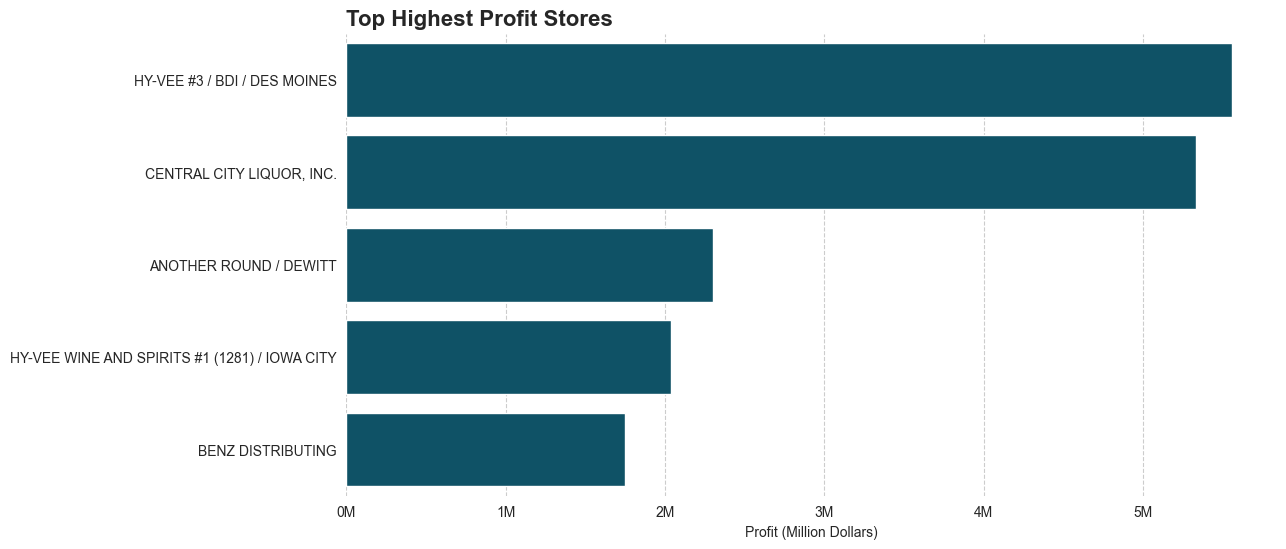

In [46]:
plt.figure(figsize = (12, 6))
sb.barplot(data = df_90_percent_profit.head(5), y = 'Store Name', x = round(df_90_percent_profit['Profit']/1000000,2), color = '#005A74')#, palette= ['#005A74', '#07B3B2', '#07B3B2' , '#07B3B2', '#07B3B2']
plt.title('Top Highest Profit Stores', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x))) 
sb.despine(left=True, bottom=True)
plt.xlabel("Profit (Million Dollars)")
plt.ylabel("")
plt.grid(axis = 'x', linestyle ='--')
plt.show()

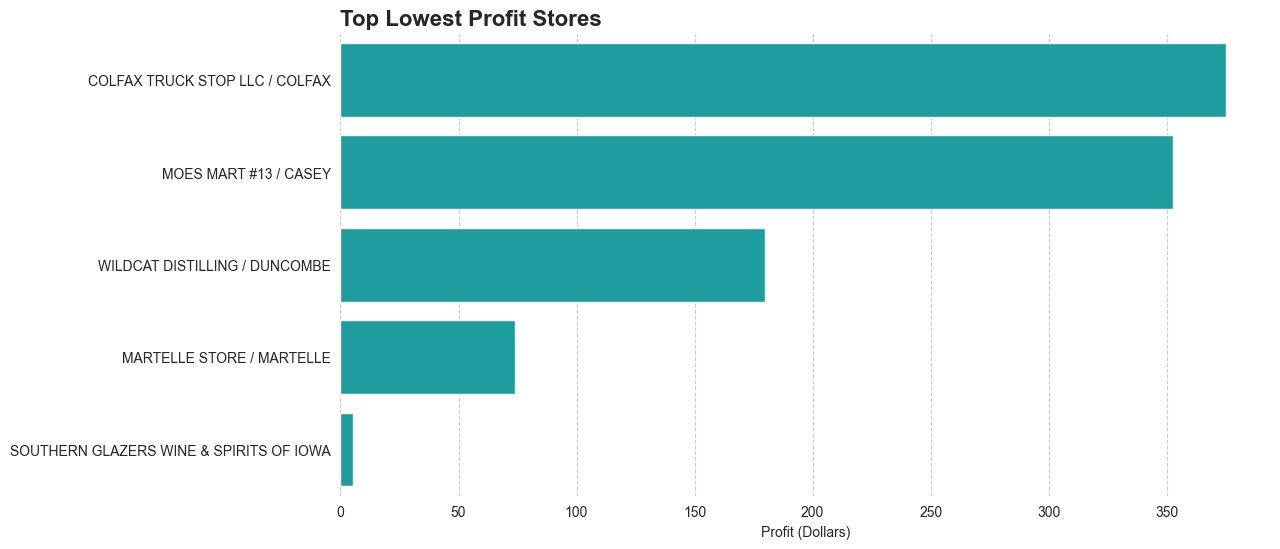

In [47]:
plt.figure(figsize = (12, 6))
sb.barplot(data = summary_customers.tail(5), y = 'Store Name', x = 'Profit', color = '#07B3B2')#, palette= ['#005A74', '#07B3B2', '#07B3B2' , '#07B3B2', '#07B3B2']
plt.title('Top Lowest Profit Stores', loc = 'left',  fontweight = 'heavy', fontsize = 16)
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x))) 
sb.despine(left=True, bottom=True)
plt.xlabel("Profit (Dollars)")
plt.ylabel("")
plt.grid(axis = 'x', linestyle ='--')
plt.show()

`Observations:`

With a total of 2,087 customers, 90% of the profit in 2023 was generated by only 991 customers. Among these, HY-VEE #3 and CENTRAL CITY LIQUOR are the top two profit-generating customers, exceeding the 5 million dollar mark per year.

On the other hand, there are customers who seem to only purchase once and show no signs of returning, as evidenced by the extremely low profit generated from these customers. Examples include SOUTHERN GLAZERS WINE & SPIRITS with less than $10 and MARTELLE STORE with around $70.

This raises the question of whether the company's business performance is overly reliant on a specific group of customers?

#### *Question 9: What is the revenue and profit per customer segment?*

In [48]:
summary_customers = pd.merge(summary_customers,data[['Store Name', 'County', 'Customer Segment']], on = 'Store Name', how = 'left')
summary_customers = summary_customers.drop_duplicates().reset_index(drop = True)

summary_segment = summary_customers.groupby('Customer Segment').agg({"Cost" : "sum", "Revenue" : "sum", "Profit" : "sum", "Store Name" : "count"})
summary_segment.sort_values(by = 'Profit', ascending= True, inplace= True)
summary_segment.reset_index(inplace = True)
summary_segment = summary_segment.rename(columns = {'Store Name' : 'Number Customers'})
summary_segment

,Customer Segment,Cost,Revenue,Profit,Number Customers
0,Need Attention,3.078768e+06,4.618891e+06,1.540123e+06,280
1,Big Spenders,2.554937e+07,3.832118e+07,1.277180e+07,659
2,Potential Loyalist,5.005630e+07,7.508349e+07,2.502720e+07,707
3,Champions,2.178309e+08,3.267737e+08,1.089428e+08,441


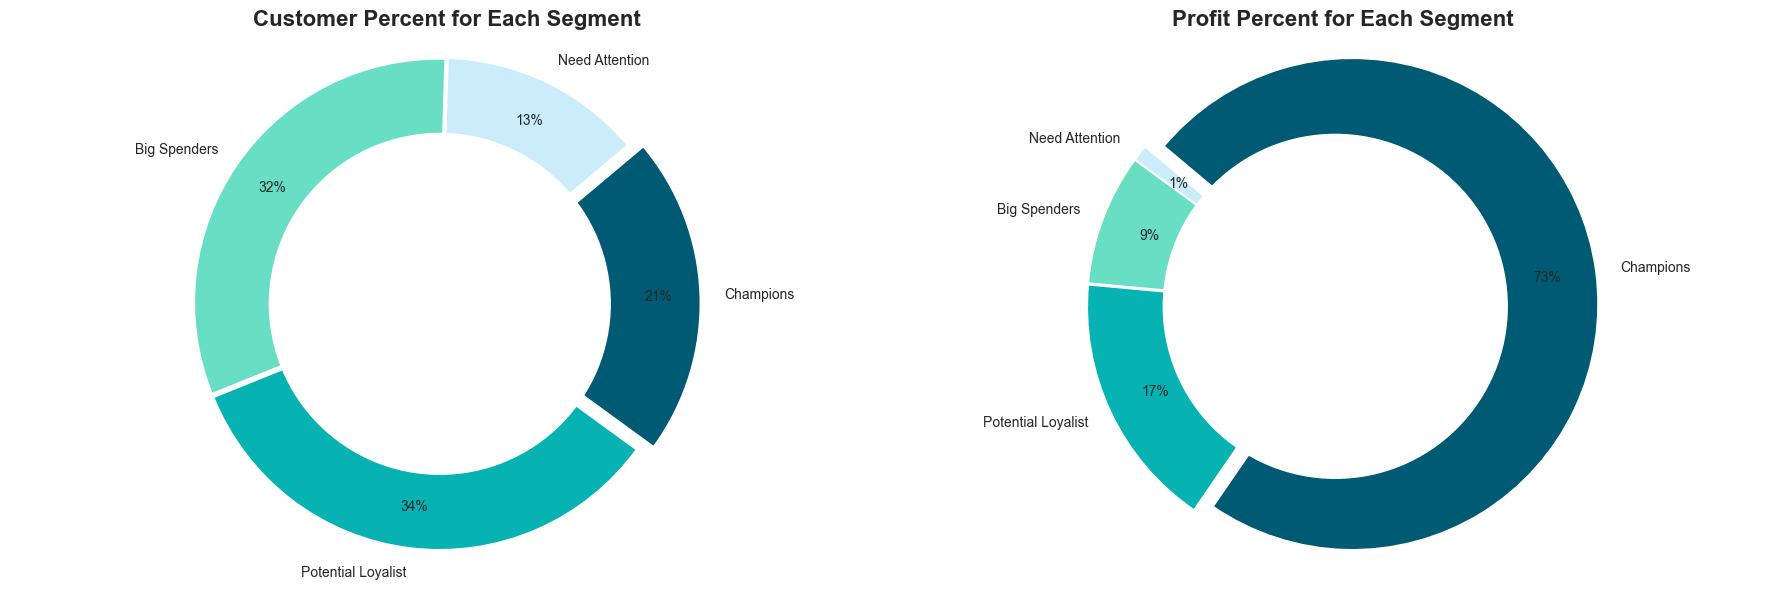

In [49]:
import matplotlib.pyplot as plt

# Define data for the first pie chart
labels_segment = [(str(summary_segment['Customer Segment'][x])) for x in range(len(summary_segment))]
explode_segment = [0.01, 0.01, 0.01, 0.07]
colors_segment = RFM_color
data_segment = summary_segment['Number Customers']

# Define data for the second pie chart
segments_profit = summary_segment['Customer Segment'].to_numpy()
profits = summary_segment['Profit'].to_numpy()
explode_profit = [0.01, 0.01, 0.01, 0.07]
colors_profit = RFM_color

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# First pie chart
axs[0].pie(data_segment,
           labels=labels_segment,
           autopct='%1.0f%%',
           startangle=40,
           explode=explode_segment,
           pctdistance=0.83,
           colors=colors_segment)
axs[0].set_title('Customer Percent for Each Segment', fontweight='heavy', fontsize=16)
circle1 = plt.Circle(xy=(0, 0), radius=.70, facecolor='white')
axs[0].add_artist(circle1)

# Second pie chart
axs[1].pie(profits,
           labels=segments_profit,
           autopct='%1.0f%%',
           startangle=140,
           pctdistance=0.80,
           colors=colors_profit,
           explode=explode_profit)
axs[1].set_title('Profit Percent for Each Segment', fontweight='heavy', fontsize=16)
circle2 = plt.Circle(xy=(0, 0), radius=.70, facecolor='white')
axs[1].add_artist(circle2)

# Equal aspect ratio ensures a circular pie chart
axs[0].axis('equal')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


`Observations:`

In 2024, we have four customer groups, with the two groups "Big Spenders" and "Potential Loyalist" accounting for 66% of the total customer base. This clearly represents a large pool of potential customers that we can leverage to drive them towards becoming "Champions" in the future.

However, when examining the profit generated by each customer group, we appear to be operating under the Pareto principle, where 73% of the profit in 2023 was generated by just 21% of the customers, namely the "Champions" group.

Looking at the previous analyses, we have a relatively healthy business situation with a positive growth trend throughout the year, a stable customer base over the months, and a consistently high retention rate for returning customers. However, in contrast to these positive indicators, the number of customers generating profit for us remains relatively low, still heavily reliant on the "Champions" group with 441 customers. This suggests that our profit per customer is not yet as efficient as it could be compared to the customer base we currently have.

The issues and solutions for each group to optimize our current customer base have been outlined in the conclusion of the Customer Segmentation Analysis section.

### **Dimension: Product**

#### *Question 10: What are the top-selling products for the year?*

In [50]:
number_products = data.groupby('Product Name')[['Bottles Sold']].sum().reset_index()
number_products.sort_values(by = 'Bottles Sold', ascending = False).head()

,Product Name,Bottles Sold
1877,FIREBALL CINNAMON WHISKEY 100.0 (ml),2333750
1888,FIREBALL CINNAMON WHISKEY MINI SLEEVE 50.0 (ml),676115
3119,MCCORMICK 80PRF VODKA PET 375.0 (ml),551354
639,BLACK VELVET 1750.0 (ml),521135
4754,TITOS HANDMADE VODKA 1000.0 (ml),504774


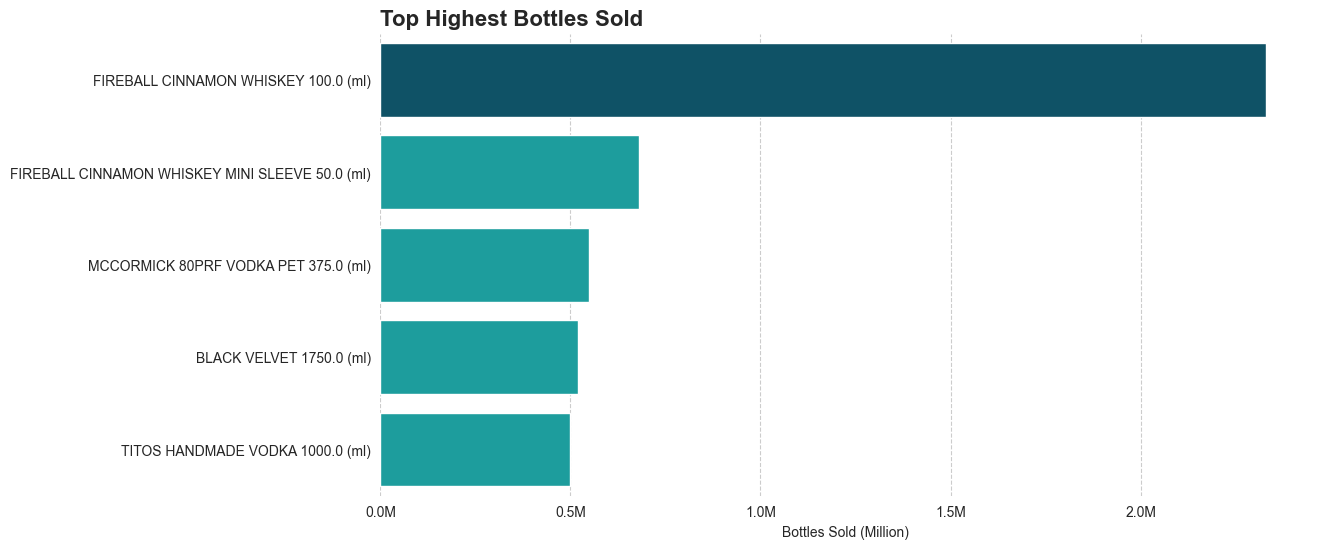

In [51]:
plt.figure(figsize = (12, 6))
sb.barplot(data = number_products.sort_values(by = 'Bottles Sold', ascending = False).head(5), x = round(number_products['Bottles Sold']/1000000,2), y = 'Product Name', palette= ['#005A74', '#07B3B2', '#07B3B2' , '#07B3B2', '#07B3B2'])
plt.title('Top Highest Bottles Sold', loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x))) 
sb.despine(left=True, bottom=True)
plt.xlabel("Bottles Sold (Million)")
plt.ylabel("")
plt.grid(axis = 'x', linestyle ='--')
plt.show()

In [52]:
number_products.describe()

,Bottles Sold
count,5.136000e+03
mean,6.057111e+03
std,4.086604e+04
min,1.000000e+00
25%,4.800000e+01
50%,4.435000e+02
75%,2.733000e+03
max,2.333750e+06


In [53]:
products_sold_under48 = number_products[number_products['Bottles Sold'] <= 48].reset_index(drop = True)
products_sold_under48.head()

,Product Name,Bottles Sold
0,10TH MOUNTAIN RYE 750.0 (ml),39
1,1792 FULL PROOF 750.0 (ml),22
2,1921 TEQUILA ANEJO 750.0 (ml),24
3,1921 TEQUILA BLANCO 750.0 (ml),24
4,1921 TEQUILA CREAM 750.0 (ml),48


In [54]:
print('Total Bottles Sold in 2023:', number_products['Bottles Sold'].sum(), 'Bottles')
print('There are 25% of Total Bottles Sold under 48 bottles in the year:', len(products_sold_under48), 'Products')

Total Bottles Sold in 2023: 31109323 Bottles
There are 25% of Total Bottles Sold under 48 bottles in the year: 1313 Products


`Observations:`

A total of 5,136 different products were sold in 2023, with a combined total of over 31 million bottles of wine. However, 25% of these products (equivalent to 1,313 products) sold less than 48 bottles in the year.

On the other hand, FIREBALL CINNAMON WHISKEY 100.0 (ml) is considered the product of the year in 2023, selling over 2.3 million bottles (4 times more than the next closest product), far outperforming the rest of the products.  

Recommendations:

 - Consider discontinuing the import of liquors belonging to the bottom 25% group (those selling less than 48 bottles in a year) to save warehousing costs.

 - Conduct an in-depth analysis of the top-selling liquors (ingredients, flavor, price, etc.) to find similar products to import in order to maximize profit per product.

In [55]:
products_summary = data.groupby('Product Name').agg({'Total Cost' : 'sum',
                                                     'Sale (Dollars)' : 'sum'}).reset_index()
products_summary['Profit (Dollars)'] = round(products_summary['Sale (Dollars)'] - products_summary['Total Cost'],2)
products_summary.sort_values(by= 'Profit (Dollars)', ascending = False, inplace= True)
products_summary.head()

,Product Name,Total Cost,Sale (Dollars),Profit (Dollars)
4755,TITOS HANDMADE VODKA 1750.0 (ml),7563387.00,11345080.50,3781693.50
4754,TITOS HANDMADE VODKA 1000.0 (ml),6647873.58,9974334.24,3326460.66
639,BLACK VELVET 1750.0 (ml),5718926.40,8578512.86,2859586.46
993,CAPTAIN MORGAN ORIGINAL SPICED BARREL 1750.0 (ml),4723288.83,7085570.33,2362281.50
4758,TITOS HANDMADE VODKA 750.0 (ml),4353730.00,6530595.00,2176865.00


In [56]:
# Sum profit all of products
products_profit = products_summary['Profit (Dollars)'].sum()

# Calculate the cumulative profit and the corresponding number of products.
cumulative_products = 0
num_products_for_90_percent = 0
products_for_90_percent = []

for index, row in products_summary.iterrows():
    cumulative_products += row['Profit (Dollars)']
    num_products_for_90_percent += 1
    products_for_90_percent.append({'Product Name': row['Product Name'], 'Profit (Dollars)': row['Profit (Dollars)']})
    if cumulative_products > 0.9 * products_profit:
        break

# Create new DataFrame from list products create 90% profit.
df_90_percent_store = pd.DataFrame(products_for_90_percent)

print("We have a total of", products_summary['Product Name'].count(),"products, with 90% of the profit generated by", num_products_for_90_percent, 'products')
print("The new DataFrame contain products information create 90% profit:")
df_90_percent_store.head()

We have a total of 5136 products, with 90% of the profit generated by 1199 products
The new DataFrame contain products information create 90% profit:


,Product Name,Profit (Dollars)
0,TITOS HANDMADE VODKA 1750.0 (ml),3781693.50
1,TITOS HANDMADE VODKA 1000.0 (ml),3326460.66
2,BLACK VELVET 1750.0 (ml),2859586.46
3,CAPTAIN MORGAN ORIGINAL SPICED BARREL 1750.0 (ml),2362281.50
4,TITOS HANDMADE VODKA 750.0 (ml),2176865.00


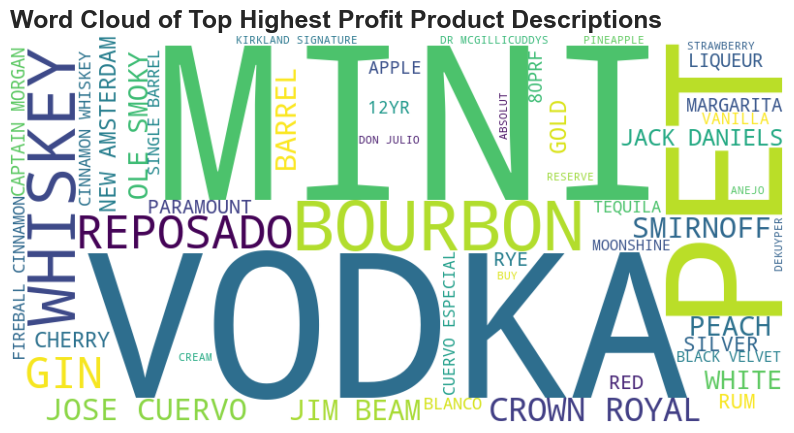

In [57]:
# Combine the names of high-view channels into a single string
text = ' '.join(df_90_percent_store['Product Name'])
text = text.replace("(ml)", "")
# Create the word cloud
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, max_words= 50).generate(text)

# Plot the word cloud
plt.figure(figsize= (10,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Highest Profit Product Descriptions', loc = 'left', fontsize = 18, fontweight = 'heavy')
plt.show()

`Observations:`

The available data indicates that 1,199 out of 5,136 types of liquor are generating 90% of the profit. This suggests that product diversity does not actually drive profit growth, with only 1/5 of the total selling well.

High-profit liquors such as VODKA, BOURBON, REPOSADO, WHISKEY, GIN, etc. need to be focused on for increased imports and analysis to identify consumer attraction characteristics in order to guide customers towards similar products. This will diversify the product output portfolio and optimize profits.

#### *Question 11: How many units of each product are sold each month?*

In [58]:
# Group Product sell by Month
product_month = data.groupby('Month Key')['Bottles Sold'].sum().reset_index()
product_month['Bottles Sold (Million)'] = round((product_month['Bottles Sold']/1000000),2)
product_month

,Month Key,Bottles Sold,Bottles Sold (Million)
0,2023-01,2307034,2.31
1,2023-02,2239764,2.24
2,2023-03,2575483,2.58
3,2023-04,2380515,2.38
4,2023-05,2786003,2.79
5,2023-06,2909628,2.91
6,2023-07,2490675,2.49
7,2023-08,2780481,2.78
8,2023-09,2491135,2.49
9,2023-10,2741321,2.74


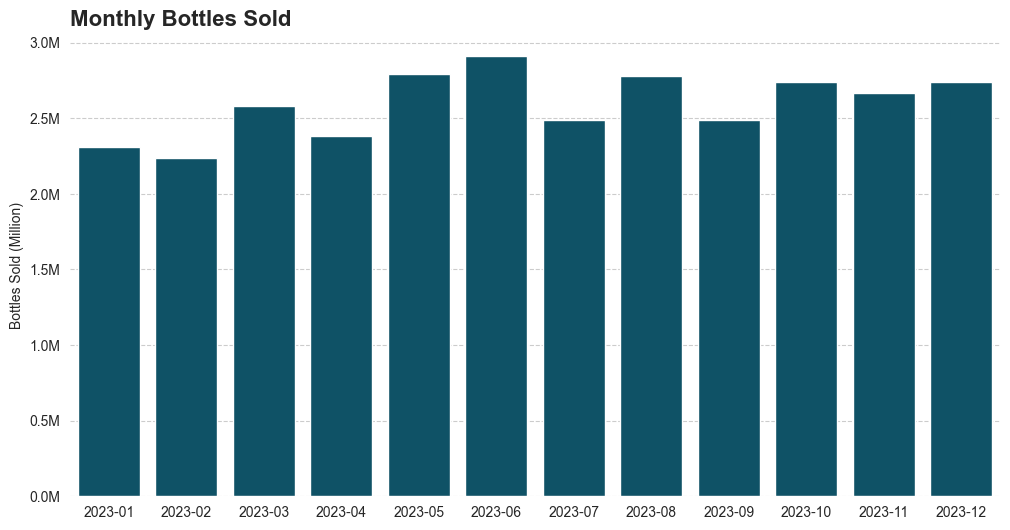

In [59]:
plt.figure(figsize= (12,6))
sb.barplot(data = product_month, x = 'Month Key', y = 'Bottles Sold (Million)', dodge=False, color = '#005A74') 
plt.title('Monthly Bottles Sold', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.despine(left=True, bottom=True)
plt.xlabel("")
plt.grid(axis = 'y', linestyle ='--')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x))) # Thay thế giá trị hiển thị trên trục y từ 3.0 thành 3.0M
plt.show()

In [60]:
print('Average Monthly Bottles Sold:',round(product_month['Bottles Sold'].mean(),0))

Average Monthly Bottles Sold: 2592444.0


`Observations:`  
Similar to the initial analyses of this report, the number of liquor bottles consumed per month also corresponds to the trends in business performance and customer trends. Liquor consumption increases sharply during the summer and winter months, and remains stable throughout the rest of the year with an average of approximately 2.6 million bottles per month.

#### *Question 12: How many different wine products does each customer consume?*

In [61]:
# Group Product Name by Store Name
products_in_store = data.groupby(['Store Name']).agg({'Bottles Sold' : 'sum', 'Product Name' : 'nunique'}).reset_index()
# products_in_store = data.groupby(['Store Name'])[['Product Name']].nunique().reset_index()
products_in_store.sort_values(by = 'Product Name', ascending = False, inplace = True)
products_in_store = products_in_store.rename(columns = {'Product Name' : 'Unique Products'}).reset_index(drop = True)
products_in_store.head()

,Store Name,Bottles Sold,Unique Products
0,"CENTRAL CITY LIQUOR, INC.",842459,2487
1,MARSHALL BEER WINE & S,79975,2381
2,HY-VEE #3 / BDI / DES MOINES,899676,2355
3,WALL TO WALL WINE AND SPIRITS / WEST DES MOINES,139986,2276
4,CYCLONE LIQUORS,47843,2136


`Observations:`  
We have a total of 5,136 different types of liquor, however, the largest number of types of liquor consumed at a single store is 2,487, less than half of the total number.

This suggests that we are spending a significant amount of resources on storing a large number of types of liquor that do not sell or sell in negligible quantities.

Due to the limited information from the current dataset, it is not possible to make observations on the inventory levels of each liquor product in order to provide more effective solutions in this analysis. Further relevant information needs to be collected in order to provide the most optimal solutions.

#### *Question 13: Do customers who consume a more diverse variety of wines tend to purchase more products and generate more profit?*

In [62]:
products_in_store = pd.merge( products_in_store,summary_customers, on = 'Store Name')
products_in_store.head()

,Store Name,Bottles Sold,Unique Products,Cost,Revenue,Profit,County,Customer Segment
0,"CENTRAL CITY LIQUOR, INC.",842459,2487,10651866.67,15980052.64,5328185.97,POLK,Champions
1,MARSHALL BEER WINE & S,79975,2381,1057536.77,1584427.10,526890.33,MARSHALL,Champions
2,HY-VEE #3 / BDI / DES MOINES,899676,2355,11109852.84,16666951.51,5557098.67,POLK,Champions
3,WALL TO WALL WINE AND SPIRITS / WEST DES MOINES,139986,2276,2694775.01,4042763.93,1347988.92,DALLAS,Champions
4,CYCLONE LIQUORS,47843,2136,763430.81,1145264.71,381833.90,STORY,Champions


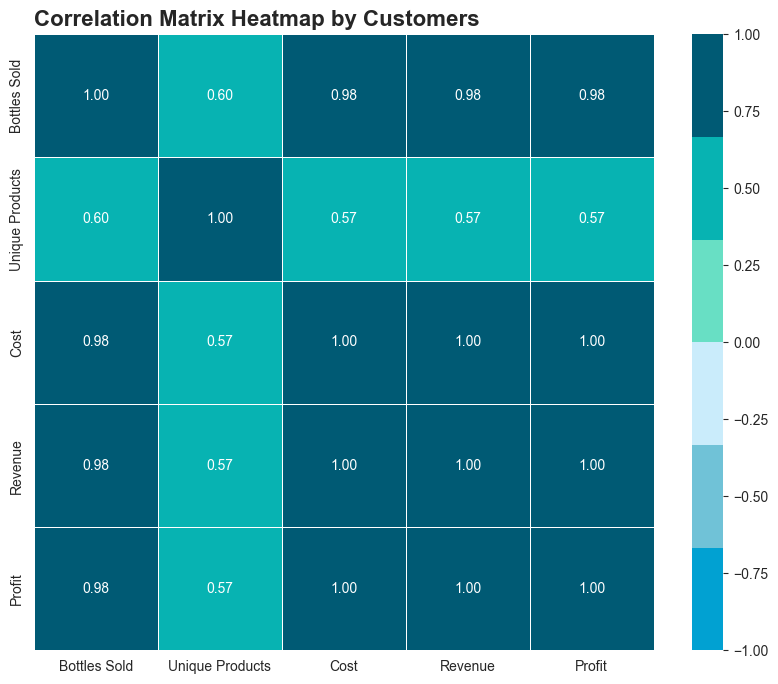

In [63]:
corr_products = products_in_store.corr()
plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap by Customers', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.heatmap(data = corr_products, annot = True, cmap= custom_palette, vmin= -1, vmax= 1, linecolor = 'white', linewidths = 0.5, fmt = '.2f')
plt.show();

`Observations:`  
While product diversity has a positive impact, it is not the main factor influencing metrics such as revenue, profit, and total sales. The correlation values are not particularly strong, ranging only from 0.5 to 0.6.

#### *Question 14: Is the number of wine types consumed affected by customer segment?*

In [64]:
products_seg = data.groupby(['Customer Segment'])['Product Name'].nunique().to_frame().sort_values(by = 'Product Name', ascending= True).reset_index()
products_seg

,Customer Segment,Product Name
0,Need Attention,1956
1,Big Spenders,3313
2,Potential Loyalist,3667
3,Champions,5039


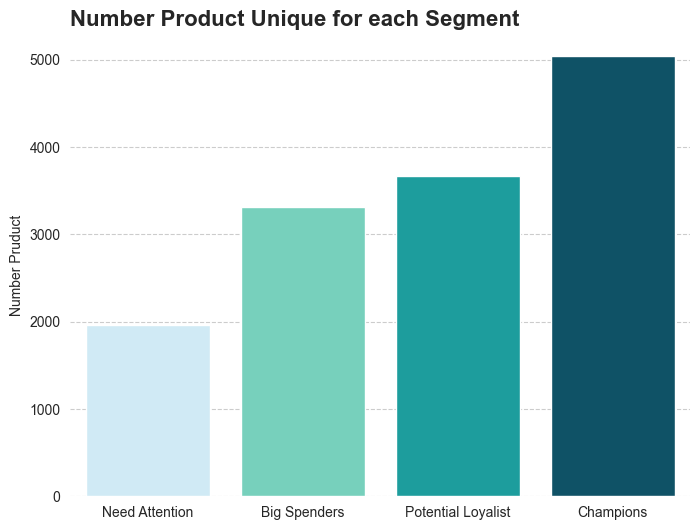

In [65]:
plt.figure(figsize = (8,6))
sb.barplot(data = products_seg, x = 'Customer Segment', y = 'Product Name', palette= RFM_color)
plt.title("Number Product Unique for each Segment", loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.despine(left=True, bottom=True)
plt.xlabel("")
plt.ylabel("Number Pruduct")
plt.grid(axis = 'y', linestyle ='--')
plt.show();

`Observations:`  
As we can easily see from the bar chart above, customer segments have a significant impact on the consumption of various types of liquor.

Specifically, the Champions segment consumes 5,039 out of the 5,136 liquor products we currently have, meaning that these customers consume almost all of the products we have, even though the number of customers in this segment is only 441 stores.

Meanwhile, the Big Spenders and Potential Loyalist segments consume between 3,300 and 3,600 different products, with a moderate level of diversity for these two groups.

And the lowest is the Need Attention segment, which consumes only less than 2,000 different products in a year.

### **Dimension: Place**

#### *Question 15: Is the number of customers affected by geographic location?*

In [66]:
store_in_county = data.groupby(['County'])['Store Name'].nunique().to_frame().sort_values(by = 'Store Name', ascending= False).reset_index()
store_in_county = store_in_county.rename(columns = {'Store Name' : 'Count'})
store_in_county

,County,Count
0,POLK,281
1,LINN,148
2,SCOTT,95
3,BLACK HAWK,91
4,JOHNSON,86
...,...,...
94,AUDUBON,4
95,TAYLOR,4
96,ADAMS,3
97,DAVIS,2


In [67]:
#  Create colors for chart
bar_color = []
for i in range(len(store_in_county)):
    if store_in_county['County'][i] == 'POLK':
        bar_color.append('#005A74')
    else:
        bar_color.append('#07B3B2')
        

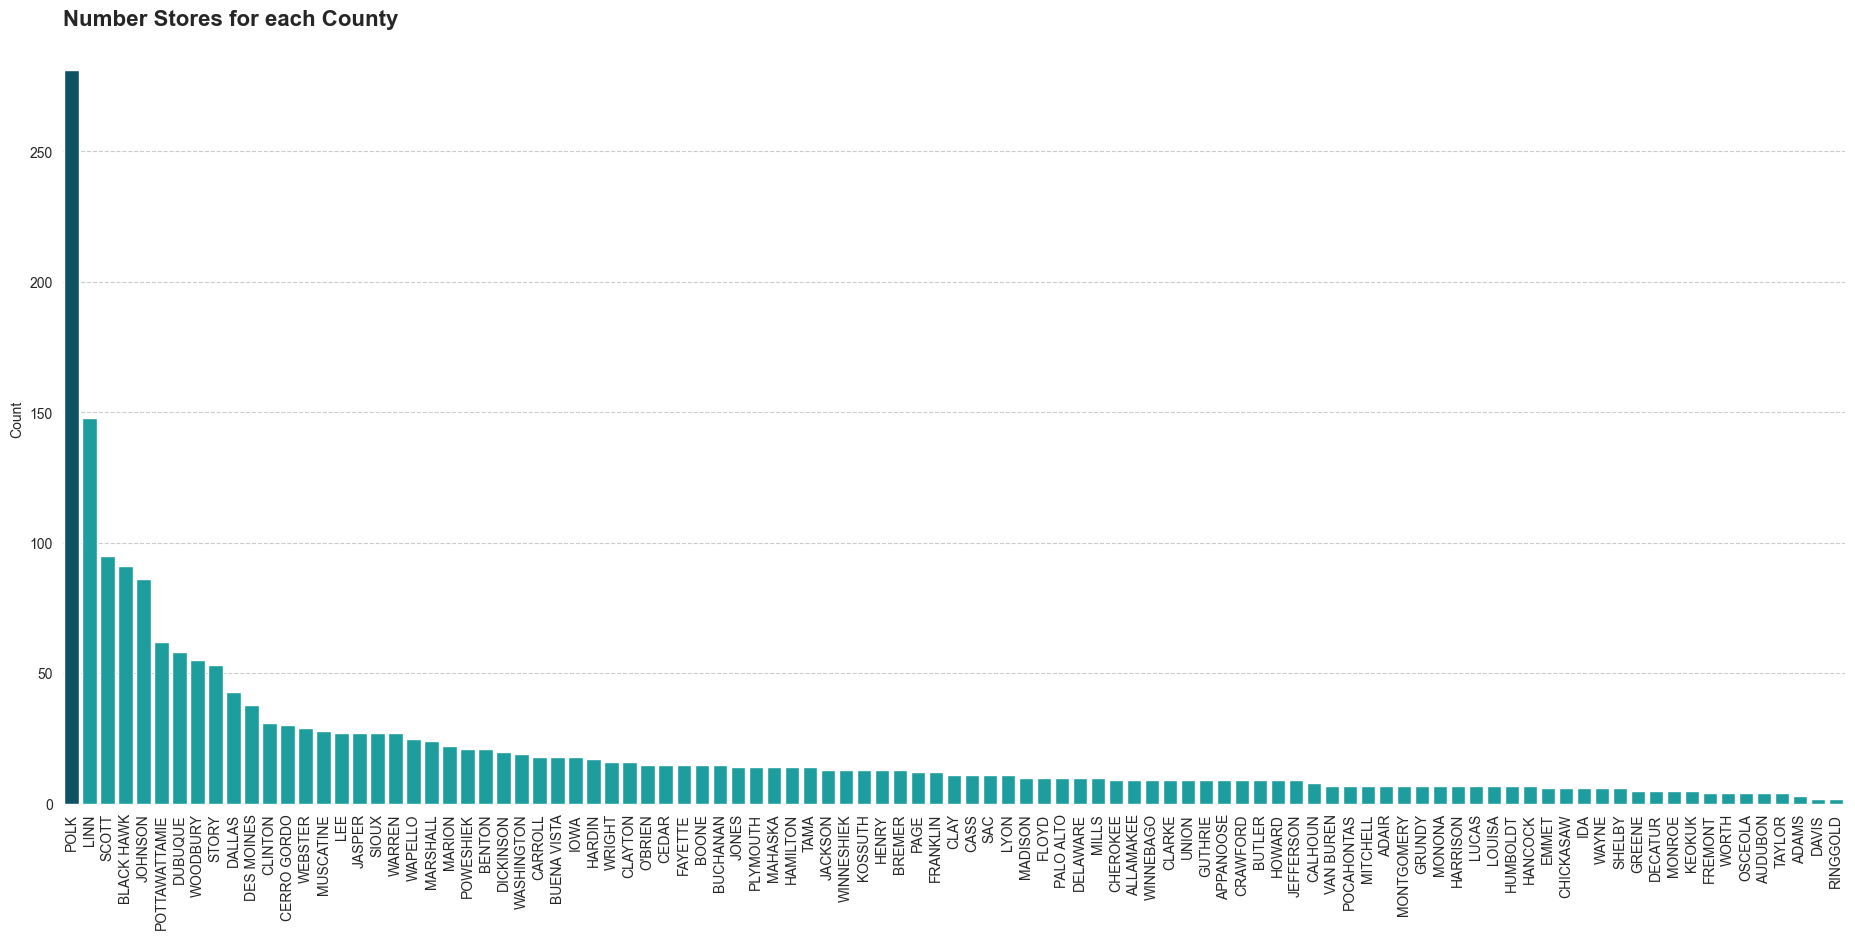

In [68]:
# Visualize Store In County
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (23,10))
sb.barplot(data = store_in_county, x = 'County', y = 'Count', dodge=False, palette= bar_color) 
plt.title('Number Stores for each County', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.despine(left=True, bottom=True)
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('')
plt.xticks(rotation = 90)
plt.show()

In [69]:
store_in_county.describe()

,Count
count,99.000000
mean,21.080808
std,34.337959
min,2.000000
25%,7.000000
50%,11.000000
75%,19.500000
max,281.000000


In [70]:
# Calculate sum stores
total_store = store_in_county['Count'].sum()

# Calculate the cumulative total and the corresponding number of stores
cumulative_store = 0
num_stores_for_50_percent = 0
stores_for_50_percent = []

for index, row in store_in_county.iterrows():
    cumulative_store += row['Count']
    num_stores_for_50_percent += 1
    stores_for_50_percent.append({'County': row['County'], 'Number Store': row['Count']})
    if cumulative_store > 0.5 * total_store:
        break

# Create new Dataframe from list county contain 50% stores
df_50_percent_store = pd.DataFrame(stores_for_50_percent)

print("We have a total of ", store_in_county['County'].count(),"counties, in which 50% of the stores are concentrated in", num_stores_for_50_percent, 'counties')
print("Create a new DataFrame containing information about the districts that account for 50% of the stores:")
df_50_percent_store

We have a total of  99 counties, in which 50% of the stores are concentrated in 13 counties
Create a new DataFrame containing information about the districts that account for 50% of the stores:


,County,Number Store
0,POLK,281
1,LINN,148
2,SCOTT,95
3,BLACK HAWK,91
4,JOHNSON,86
5,POTTAWATTAMIE,62
6,DUBUQUE,58
7,WOODBURY,55
8,STORY,53
9,DALLAS,43


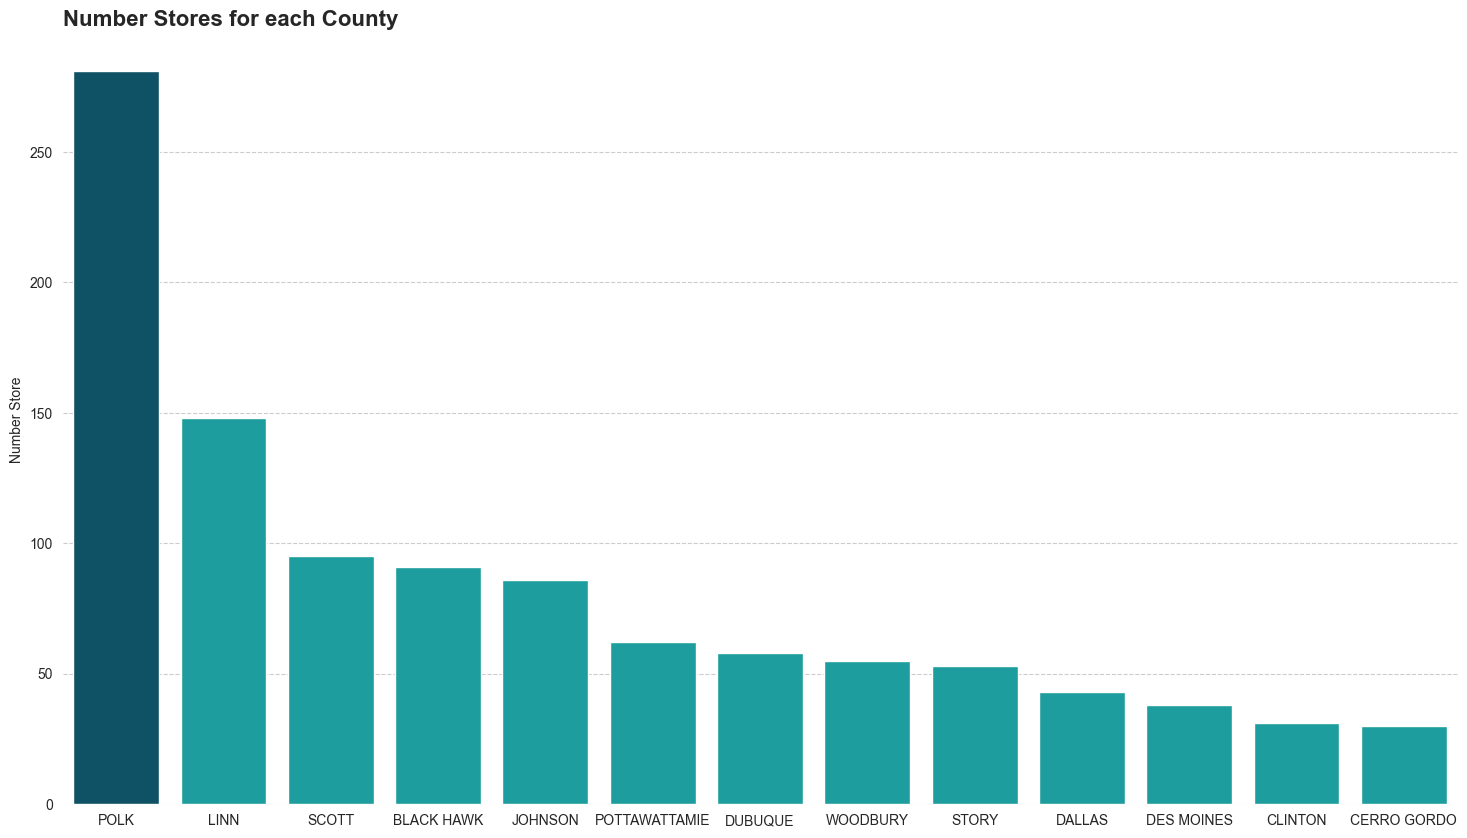

In [71]:
# Visualize Store In County
sb.set_style("whitegrid",{'axes.grid' : False})
plt.figure(figsize= (18,10))
sb.barplot(data = df_50_percent_store, x = 'County', y = 'Number Store', dodge=False, palette= bar_color) 
plt.title('Number Stores for each County', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.despine(left=True, bottom=True)
plt.xlabel('')
plt.grid(axis = 'y', linestyle ='--')
plt.show()

`Observations:`

Store count is indeed heavily influenced by geographical location, considering that 50% of our stores are concentrated in 13 out of 99 counties in the state of Iowa.

Among these, Polk County has the highest concentration of stores with 281, followed by Linn County with 148, far exceeding the number of stores in the rest of the state.

Polk County is located in the U.S. state of Iowa. According to the 2020 census, the population was 492,401. It is the most populous county in Iowa and home to over 15% of the state's residents. The county seat is Des Moines, which is also the capital city of Iowa. https://en.wikipedia.org/wiki/Polk_County,_Iowa

This partly explains why it has the highest concentration of stores in the state.

#### *Question 16: Is profit affected by geographic location?*

In [72]:
county_summary = data.groupby('County').agg({"Total Cost" : "sum",
                                             "Sale (Dollars)" : "sum"}).reset_index()
county_summary["Profit (Million)"] = round((county_summary["Sale (Dollars)"] - county_summary["Total Cost"])/1000000,2)
county_summary = county_summary.sort_values(by= "Profit (Million)", ascending= False).reset_index(drop= True)

county_summary

,County,Total Cost,Sale (Dollars),Profit (Million)
0,POLK,69972230.94,1.049675e+08,35.00
1,LINN,24925927.87,3.739126e+07,12.47
2,SCOTT,18807449.30,2.821186e+07,9.40
3,JOHNSON,17011481.57,2.552103e+07,8.51
4,BLACK HAWK,15121618.61,2.268442e+07,7.56
...,...,...,...,...
94,VAN BUREN,150011.19,2.250512e+05,0.08
95,RINGGOLD,163668.05,2.455329e+05,0.08
96,FREMONT,147890.71,2.218630e+05,0.07
97,TAYLOR,112633.95,1.689784e+05,0.06


In [73]:
county_summary = pd.merge(county_summary[['County', 'Profit (Million)']], store_in_county, on = 'County')
county_summary

,County,Profit (Million),Count
0,POLK,35.00,281
1,LINN,12.47,148
2,SCOTT,9.40,95
3,JOHNSON,8.51,86
4,BLACK HAWK,7.56,91
...,...,...,...
94,VAN BUREN,0.08,7
95,RINGGOLD,0.08,2
96,FREMONT,0.07,4
97,TAYLOR,0.06,4


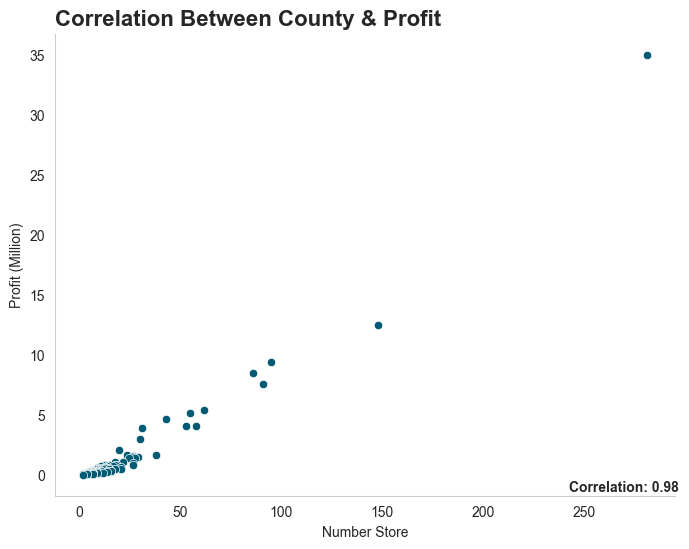

In [74]:
# Calculate the correlation coefficient
correlation = county_summary['Count'].corr(county_summary['Profit (Million)'])
# Create chart
plt.figure(figsize = (8,6))
sb.scatterplot(data = county_summary, x = 'Count', y = 'Profit (Million)', color = '#005A74')
plt.xlabel('Number Store')
plt.title('Correlation Between County & Profit', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.despine(left=False, bottom=False)
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.83, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

In [75]:
# Group average liquor price by each product, month, area
county_price_bottles = data.groupby(['County', 'Month', 'Product Name']).agg({'State Bottle Retail' : 'mean', 'Bottles Sold' : 'sum'}).reset_index()

# Group average liquor price of each county by month
county_price_bottles = county_price_bottles.groupby(['County', 'Month']).agg({'State Bottle Retail' : 'mean', 'Bottles Sold' : 'sum'}).reset_index()

#  Group average liquor price by area
county_price_bottles = county_price_bottles.groupby('County').agg({'State Bottle Retail' : 'mean', 'Bottles Sold' : 'sum'}).reset_index()

county_price_bottles['Bottles Sold (Million)'] = round(county_price_bottles['Bottles Sold']/1000000, 2)
county_price_bottles['State Bottle Retail'] = round(county_price_bottles['State Bottle Retail'], 2)

county_summary = pd.merge(county_summary, county_price_bottles[['County', 'State Bottle Retail', 'Bottles Sold (Million)']], on = 'County')
county_summary

,County,Profit (Million),Count,State Bottle Retail,Bottles Sold (Million)
0,POLK,35.00,281,25.99,7.20
1,LINN,12.47,148,24.45,2.74
2,SCOTT,9.40,95,23.70,2.19
3,JOHNSON,8.51,86,24.77,1.61
4,BLACK HAWK,7.56,91,22.95,1.74
...,...,...,...,...,...
94,VAN BUREN,0.08,7,17.35,0.02
95,RINGGOLD,0.08,2,18.62,0.02
96,FREMONT,0.07,4,19.97,0.02
97,TAYLOR,0.06,4,17.01,0.01


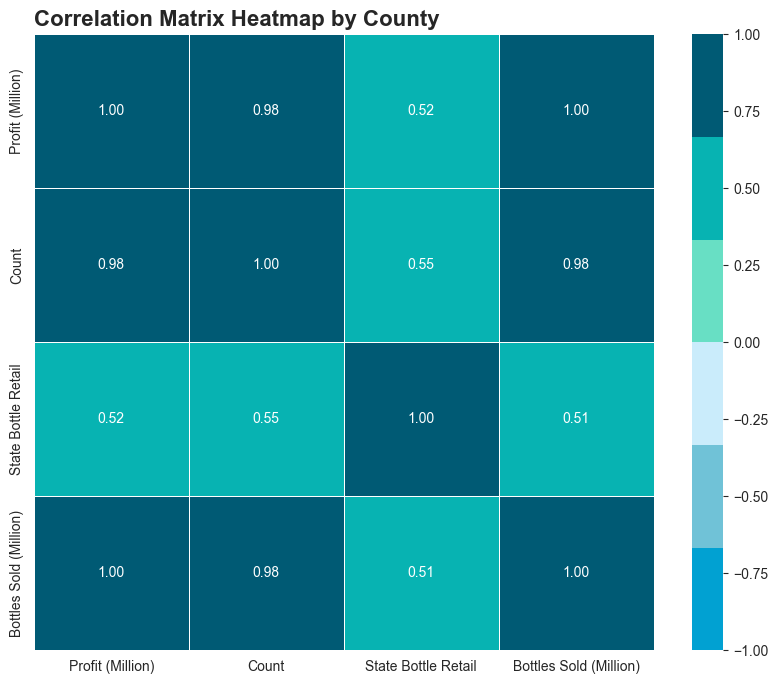

In [76]:
county_corr = county_summary.corr()

plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap by County', loc = 'left',  fontweight = 'heavy', fontsize = 16)
sb.heatmap(data = county_corr, annot = True, cmap= custom_palette, vmin= -1, vmax= 1, linecolor = 'white', linewidths = 0.5, fmt = '.2f')
plt.show();

`Observations:`

Profit is indeed influenced by geographical location. In central districts with high population density and a good standard of living, a large portion of stores are distributed to meet the high demand for living needs. The concentration of stores in these "golden" areas drives sales and increases profits in a positive linear relationship.

However, retail/wholesale prices are not geographically dependent. The correlation coefficients are only at an average level, indicating that we maintain relatively stable selling prices that are not overly influenced by external factors. This is also a good sign for customer retention.

## **III. Project Conclusion**

`Positive Trends:`

 - Revenue grows seasonally (summer and winter). Profit margins remain relatively high throughout the year at 33%.

 - Average monthly revenue growth rate in 2023 was 2.64%, not a significant figure, but considering the global economic downturn, positive growth is a positive sign for the state's business.

 - A total of 2,616,994 liquor orders were placed in 2023, with a similar trend of increase and decrease as revenue, with order volumes increasing sharply in summer and winter.

 - The average order value remains stable throughout the year with a difference between the highest and lowest months not being significant (only around $30), not being affected by external factors such as seasonality, peak/low hours.

 - 2,087 customers across the state, with the number of active customers per month always remaining very high, from 1,800 to 1,900. 

 - 21% of customers (Champions group) generated 73% of profits in 2023. This shows that we have a very effective Champions customer group.

 - Diverse products with 5,136 different products and over 31 million bottles of liquor sold in 2023. Some types of liquor bring very high profits, such as: VODKA, BOURBON, REPOSADO, WHISKEY, GIN,...

 - The customer base spans all 99 counties in the state of Iowa, indicating that our products have high recognition and offer the potential to supply liquor outside the state in the future (expand business scope).

`Problems:`

 - Negative growth still occurs in two periods, July (-12.97%) and September (-11.8%).

    - Holidays and shopping seasons drive exceptional growth rates but lead to a significant decline thereafter.

    - Not adapting to seasonal fluctuations for uncontrolled imports will cost a lot in shipping costs.

 - Summer and winter have high order volumes, but only lead to order frequency and do not actually increase the value per order, resulting in high transportation, warehousing, etc. costs because of having to deliver many small orders. Revenue increases but costs will also increase linearly.

 - Apart from the highly effective Champions group, the remaining 3 customer groups generate a fairly modest profit rate (27% for all 3 groups). This shows that we are still not fully exploiting the 2,087 existing customers.

 - 25% of the total 5,136 types of liquor are sold for less than 48 bottles, with the most consumed type of liquor being consumed at one store being 2,487 (less than 1/2 of the total). This is a large amount of inefficient storage, cost of goods, inventory, etc. costs that we cannot convert into profit.

 - Although liquor is distributed to all counties in the state, 50% of customers are concentrated in only 13 of the 99 counties. Polk County is the center, with the most customers at 281 stores. This greatly affects profits based on geographic location, as shipping costs to distant counties increase, although prices are not affected.

`Recommendations:`

 - Adapt to seasonal trends by increasing orders in summer and winter to meet high demand, while reducing orders in the remaining two seasons (low consumption periods). This will reduce inventory and storage costs during periods of low demand.

 - Optimize costs through order value:

    - Analyze the order value in the year to find a certain order threshold. Orders with a value below the threshold will have higher shipping costs and vice versa.

    - In periods of growth (summer and winter), propose special policies for customers to increase the order value in one order, such as discounts, free shipping,...

 - Streamline the product portfolio:

    - Consider cutting back on importing liquors in the 25% group (group selling less than 48 bottles in a year) to save storage costs.

    - In-depth analysis of top-selling liquors (ingredients, taste, price,...) to find similar imports to maximize profit on the product.

 - As it can be seen, most customers in the state are concentrated in central counties or the capital, expanding the customer base outside the state of Iowa can potentially bring in a large source of revenue and customers in the future.

*(The above is the entire summary conclusion of the Sales Analysis section, details have been analyzed in more depth in each business question.)*

## **IV. Export Data**

In [77]:
 # Sales data to build dashboard in PBI
data_sales = data[['Invoice Number', 'Order Date', 'Store Number', 'Product Key', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold']]
data_sales.to_csv('data_model_pbi/Iowa_Liquor_Sales.csv', index = False)
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616994 entries, 0 to 2616993
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Invoice Number       object        
 1   Order Date           datetime64[ns]
 2   Store Number         int64         
 3   Product Key          int64         
 4   State Bottle Cost    float64       
 5   State Bottle Retail  float64       
 6   Bottles Sold         int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 139.8+ MB


In [78]:
# Customer data to build dashboard in PBI
data_customers = data[['Store Number', 'Store Name', 'Address', 'County', 'Store Longitude', 'Store Latitude']].drop_duplicates()
data_customers.reset_index(drop = True, inplace = True)

data_rfm = pd.read_csv('data_cleaned/Iowa_Liquor_RFMdata.csv')

data_customers = pd.merge(data_customers, data_rfm[['Store Number', 'Recency', 'Frequency', 'Monetary', 'Customer Segment']], on = 'Store Number')
data_customers.to_csv('data_model_pbi/Iowa_Liquor_Customers.csv', index = False)
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2086
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store Number      2087 non-null   int64  
 1   Store Name        2087 non-null   object 
 2   Address           2087 non-null   object 
 3   County            2087 non-null   object 
 4   Store Longitude   2087 non-null   float64
 5   Store Latitude    2087 non-null   float64
 6   Recency           2087 non-null   int64  
 7   Frequency         2087 non-null   int64  
 8   Monetary          2087 non-null   float64
 9   Customer Segment  2087 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 179.4+ KB


In [79]:
# Product data to build dashboard in PBI
data_products = data[['Product Key', 'Product Name', 'Bottle Volume (ml)']].drop_duplicates().reset_index(drop = True)
data_products.to_csv('data_model_pbi/Iowa_Liquor_Products.csv', index = False)
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product Key         5136 non-null   int64  
 1   Product Name        5136 non-null   object 
 2   Bottle Volume (ml)  5136 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 120.5+ KB


In [80]:
# County data to build dashboard in PBI
data_county = data[['County', 'Store Longitude', 'Store Latitude']].drop_duplicates(subset= 'County').reset_index(drop = True)
data_county.to_csv('data_model_pbi/Iowa_Liquor_County.csv', index = False)
data_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           99 non-null     object 
 1   Store Longitude  99 non-null     float64
 2   Store Latitude   99 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.4+ KB
